# Exploratory Data Analysis

In [ ]:
library("tidyverse")
library("ggplot2")
library("directlabels")
library("zoo")
library('corrplot')
library("Hmisc")
library("PerformanceAnalytics")
library("R.utils")
library("GGally")
library("reshape2")
library(ggcorrplot)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.1     v purrr   0.3.4
v tibble  3.0.1     v dplyr   1.0.0
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'directlabels' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package

In [ ]:
datapath <- '../Data'

#read in data
datafile <- file.path(datapath, 'EDA_dataset.csv')
df <- read.csv(datafile, header=TRUE, na.strings=c("","NA"))

## view info about data
str(df)
summary(df)

'data.frame':	630 obs. of  28 variables:
 $ fitness_discipline           : Factor w/ 6 levels "cardio","cycling",..: 5 2 5 2 5 2 5 2 5 2 ...
 $ is_total_work_personal_record: Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ start_time                   : Factor w/ 630 levels "2017-01-14 10:46:00-06:00",..: 630 629 628 627 626 625 624 623 622 621 ...
 $ difficulty_estimate          : num  2.98 8.03 3.53 8.27 2.98 ...
 $ duration                     : num  5 60 5 45 5 30 5 60 5 45 ...
 $ instructor_name              : Factor w/ 27 levels "Aditi Shah","Adrian Williams",..: 20 20 10 10 20 20 20 20 10 10 ...
 $ avg_output                   : int  0 89 0 88 0 77 0 84 0 82 ...
 $ avg_cadence                  : int  0 85 0 87 0 87 0 85 0 82 ...
 $ avg_resistance               : int  0 35 0 33 0 32 0 34 0 35 ...
 $ avg_speed                    : num  0 15.3 0 14.7 0 14.5 0 15 0 14.9 ...
 $ total_output                 : int  0 321 0 238 0 139 0 303 0 222 ...
 $ total_distance      

  fitness_discipline is_total_work_personal_record
 cardio    :  3      False:621                    
 cycling   :329      True :  9                    
 meditation:  2                                   
 strength  : 75                                   
 stretching:207                                   
 yoga      : 14                                   
                                                  
                     start_time  difficulty_estimate    duration    
 2017-01-14 10:46:00-06:00:  1   Min.   :2.056       Min.   : 5.00  
 2017-01-16 11:02:45-06:00:  1   1st Qu.:3.425       1st Qu.: 5.00  
 2017-01-17 06:51:26-06:00:  1   Median :6.343       Median :20.00  
 2017-01-21 09:47:04-06:00:  1   Mean   :5.730       Mean   :24.08  
 2017-04-24 12:01:56-05:00:  1   3rd Qu.:7.362       3rd Qu.:45.00  
 2017-04-26 15:02:20-05:00:  1   Max.   :9.559       Max.   :90.00  
 (Other)                  :624                                      
           instructor_name   avg_output 

## Univariate Distribution

### Fitness Discipline

`summarise()` ungrouping output (override with `.groups` argument)


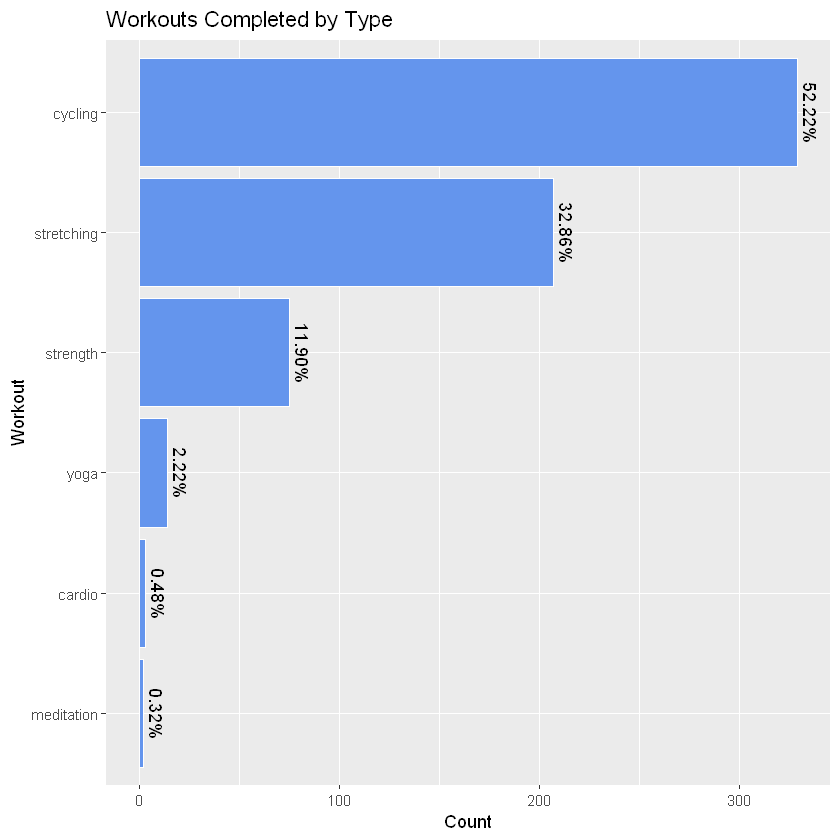

In [ ]:
df %>% group_by(fitness_discipline) %>% summarise(n=n(), perc=n()/sum(n())) %>%
    ggplot(aes(x=reorder(fitness_discipline, n), y=n)) +
    geom_col(fill = 'cornflower blue', color='white') +
    geom_text(aes(label=scales::percent(n/sum(n))), vjust=-.5, angle =-90) +
    labs(title = 'Workouts Completed by Type', x='Workout', y='Count') +
    coord_flip()

In [ ]:
#get the mean of difficulty by workout type
df %>% group_by(fitness_discipline) %>% summarise(min_difficulty=min(difficulty_estimate),
                                                  mean_difficulty = mean(difficulty_estimate),
                                                  max_difficulty = max(difficulty_estimate), 
                                                  mean_duration = mean(duration),
                                                  mean_calories = mean(total_calories),
                                                  count=sum(n())) %>% arrange(desc(count))

`summarise()` ungrouping output (override with `.groups` argument)


fitness_discipline,min_difficulty,mean_difficulty,max_difficulty,mean_duration,mean_calories,count
cycling,3.6271,7.132832,9.5585,38.981763,419.66869,329
stretching,2.9812,3.286802,4.6176,5.169082,38.12560,207
strength,4.5727,6.639931,7.8480,13.133333,71.62667,75
yoga,3.0963,4.521143,5.3690,15.714286,55.57143,14
cardio,5.3029,5.606033,5.7576,20.000000,130.66667,3
meditation,2.0561,2.218200,2.3803,5.000000,134.00000,2


### Difficulty Estimate

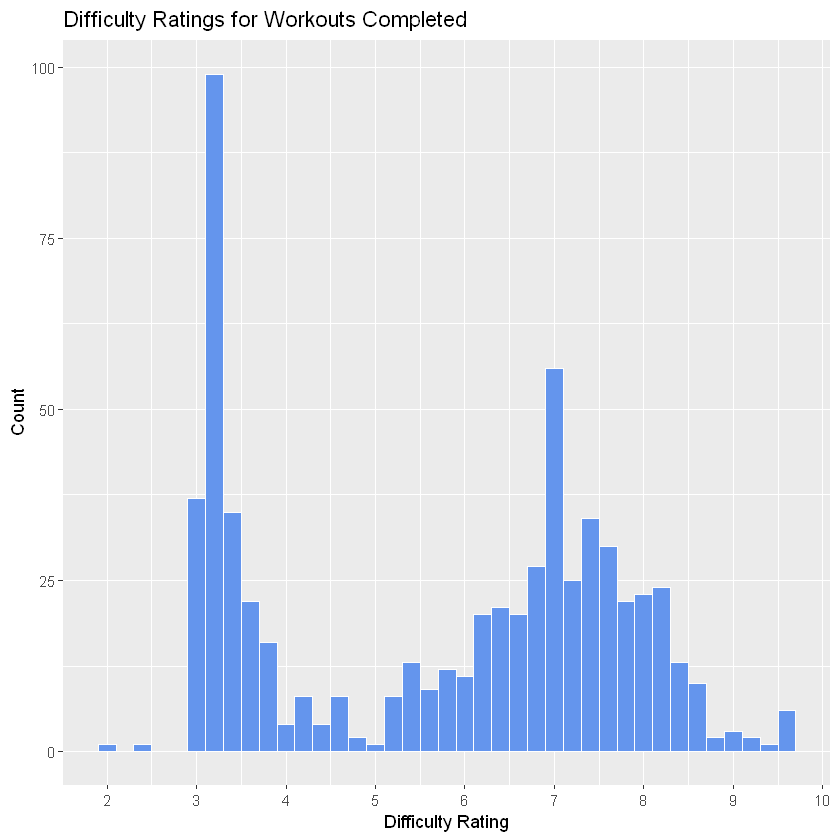

In [ ]:
ggplot(data = df) +
  geom_histogram(aes(x = difficulty_estimate), fill = 'cornflower blue', color='white', binwidth = .2) +
  scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) +
  labs(title = 'Difficulty Ratings for Workouts Completed', x='Difficulty Rating', y='Count')


Most workouts are difficulty between 3 and 9.5.  Stretching workouts can be known to be on the low end and cycling/strength can be higher.  Adding a facet wrap by fitness_discipline.

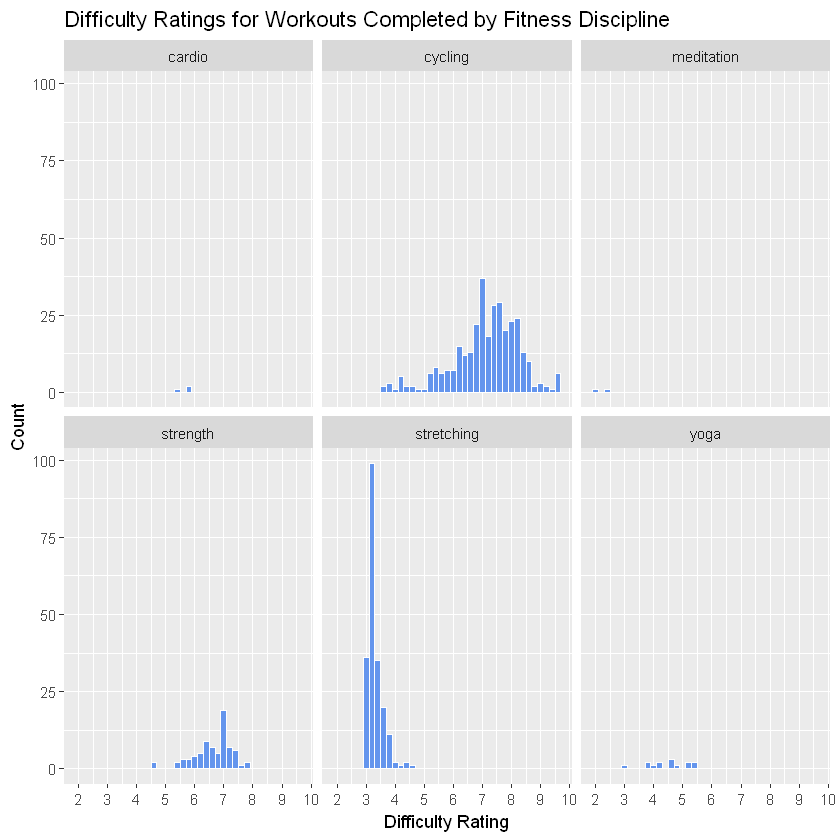

In [ ]:
ggplot(data = df) +
  geom_histogram(aes(x = difficulty_estimate), fill = 'cornflower blue', color='white', binwidth = .2) +
  scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) +
  labs(title = 'Difficulty Ratings for Workouts Completed by Fitness Discipline', x='Difficulty Rating', y='Count') +
  facet_wrap(~fitness_discipline)


Cycling workouts have a normally distributed difficulty rating starting at 3 and ending at 9.  Stretching has a positive skew with a minimum at 3 and max around 4.5  Strength workouts are approximately normally distributed with a rating between 5 and 8.

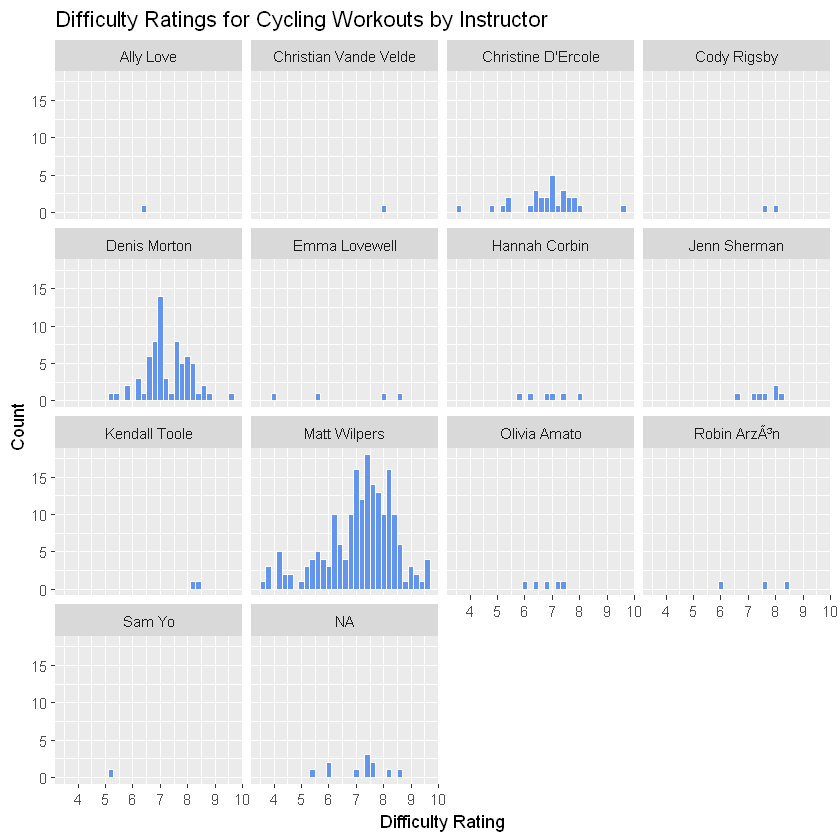

In [ ]:
#### Cycling Workouts by Instructor
df %>% filter(fitness_discipline == 'cycling') %>%
    ggplot() +
      geom_histogram(aes(x = difficulty_estimate), fill = 'cornflower blue', color='white', binwidth = .2) +
      scale_x_continuous(breaks = scales::pretty_breaks(n = 5)) +
      labs(title = 'Difficulty Ratings for Cycling Workouts by Instructor', x='Difficulty Rating', y='Count') +
      facet_wrap(~instructor_name)

Most rides are with Matt Wilpers and he has the higher mean between 7 and 9.  I want to plot the number of rides with each instructor with their respective averages

`summarise()` ungrouping output (override with `.groups` argument)


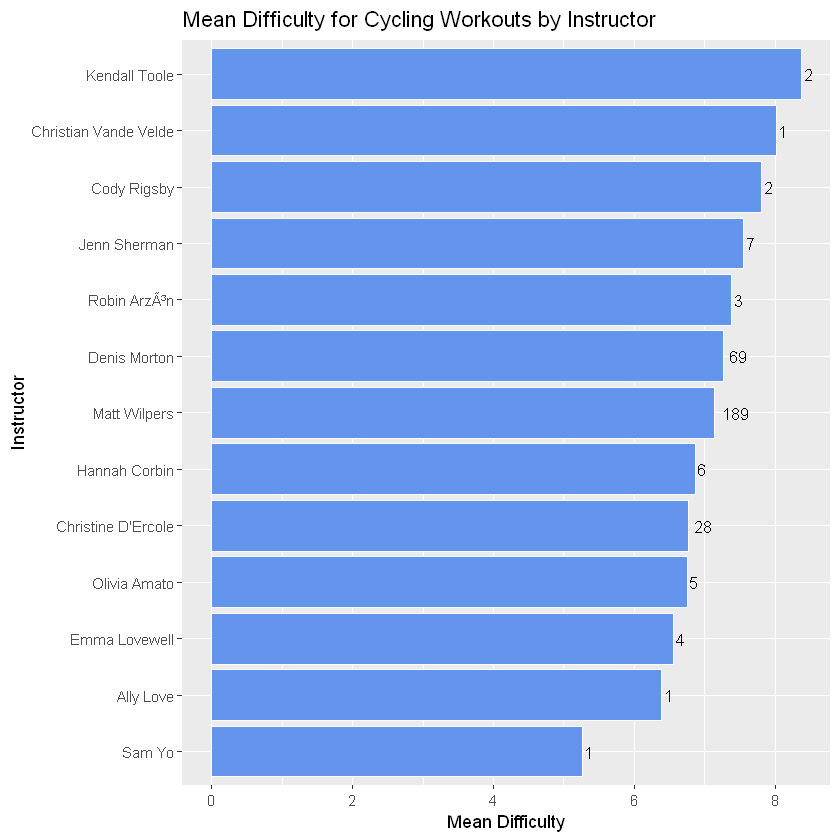

In [ ]:
#### Cycling Workouts by Instructor
df %>% 
    filter(fitness_discipline == 'cycling') %>% 
    group_by(instructor_name) %>%  
    summarise(n=n(), mean_difficulty = mean(difficulty_estimate)) %>%
    drop_na() %>%
    ggplot(aes(x=reorder(instructor_name, mean_difficulty), y=mean_difficulty)) +
    geom_col(fill = 'cornflower blue', color='white') +
    geom_text(aes(label=n), hjust=-.3,  size=3.5) +
    labs(title = 'Mean Difficulty for Cycling Workouts by Instructor', x='Instructor', y='Mean Difficulty') +
    coord_flip()

### Duration

In [ ]:
#convert duration to categorical
df$duration = as.factor(df$duration)

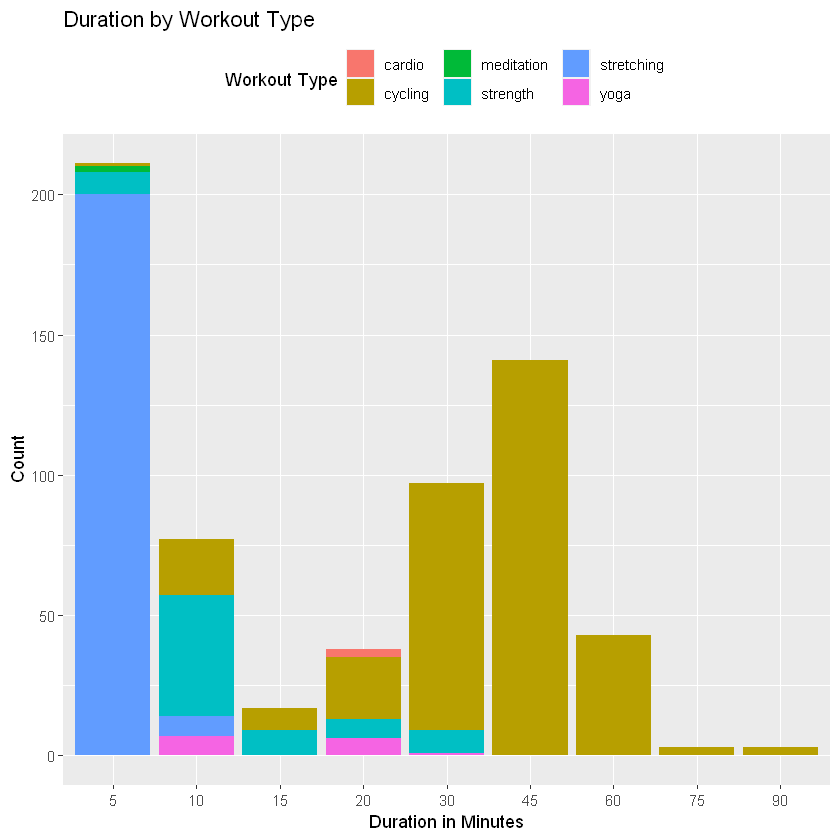

In [ ]:
ggplot(data = df, aes(x = duration, fill=fitness_discipline)) +
  geom_bar() +
  labs(title = 'Duration by Workout Type', x='Duration in Minutes', y='Count', fill="Workout Type") +
    theme(legend.position='top')

### Metrics
#### Output, Cadence, Resistance, Speed, Heart Rate

Most metrics are only available for cycling workouts.  Heart Rate may be available for some stretching workouts. For the purpose of these graphs, I'm filtering to just cycling workouts again.

#### View Average Metrics Over Time

In [ ]:
df$date_only = as.Date(df$date_only, format = '%m/%d/%Y')

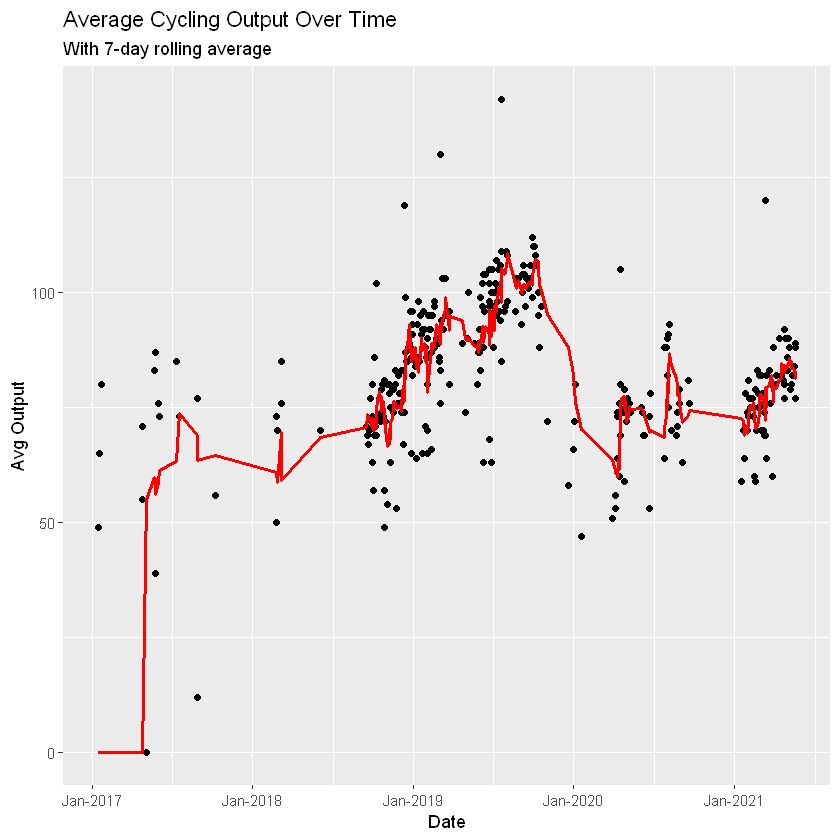

In [ ]:
df %>% 
    filter(fitness_discipline == 'cycling') %>% 
    mutate(rolling_avg= rollmean(avg_output, 7, align="left", fill=0)) %>%
    ggplot(aes(x=date_only, y=avg_output)) +
    geom_point()+
    geom_line(aes(y=rolling_avg), color="red", size=1) +
    scale_x_date(date_labels='%b-%Y') +
    labs(title = 'Average Cycling Output Over Time', subtitle='With 7-day rolling average', x='Date', y='Avg Output')

There are three segments within this graph where workouts stopped and started. The output until January 2019 was sporadic.  In Late 2018, workouts became more consistent and average output increased.  There was a dip between 2019 and 2020.  The workouts became more consistent again. The average output started lower but began rising again.  This was the time period where I had multiple surgeries and my fitness lapsed.  I suspect that all metrics follow this same pattern.

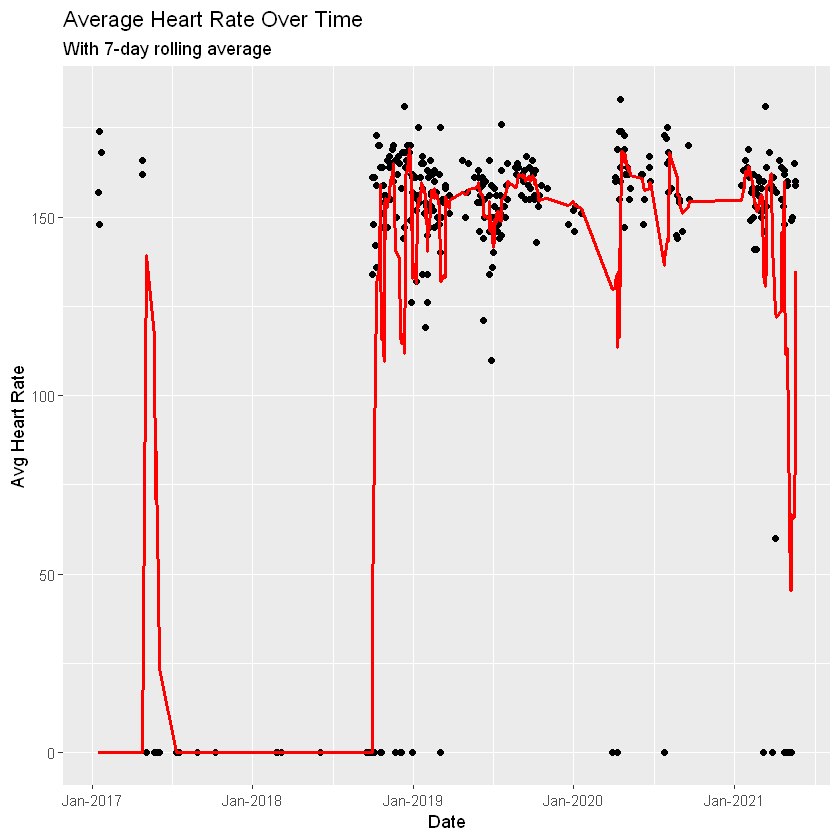

In [ ]:
df %>% 
    filter(fitness_discipline == 'cycling') %>% 
    mutate(rolling_avg= rollmean(avg_heart, 7, align="left", fill=0)) %>%
    ggplot(aes(x=date_only, y=avg_heart)) +
    geom_point()+
    geom_line(aes(y=rolling_avg), color="red", size=1) +
    scale_x_date(date_labels='%b-%Y') +
    labs(title = 'Average Heart Rate Over Time', subtitle='With 7-day rolling average', x='Date', y='Avg Heart Rate')

Dips in average heart rate could be caused by rides where a heart rate monitor was not worn.  The mean of an average ride of the same duration can be used to replace the 0s.

In [ ]:
df[df == 0] <- NA    

In [ ]:
df$new_avg_heart <- ave(df$avg_heart,df$duration,FUN=function(x) 
  ifelse(is.na(x), mean(x,na.rm=TRUE), x))

In [ ]:
df[is.na(df$avg_heart),]

,fitness_discipline,is_total_work_personal_record,start_time,difficulty_estimate,duration,instructor_name,avg_output,avg_cadence,avg_resistance,avg_speed,...,Power.Zone,month,year,weekday,hour,date_only,percent_leaderboard_rank,body_mass,lean_body_mass,new_avg_heart
11,strength,False,2021-05-12 18:57:16-05:00,7.1040,20,Selena Samuela,NA,NA,NA,NA,...,False,5,2021,2,17,2021-05-12,NA,191.4,123.8,164.0000
12,strength,False,2021-05-12 18:44:27-05:00,7.8480,10,Tunde Oyeneyin,NA,NA,NA,NA,...,False,5,2021,2,17,2021-05-12,NA,191.4,123.8,140.9412
13,strength,False,2021-05-12 18:31:13-05:00,7.1723,10,Matty Maggiacomo,NA,NA,NA,NA,...,False,5,2021,2,17,2021-05-12,NA,191.4,123.8,140.9412
14,strength,False,2021-05-11 19:11:26-05:00,7.4679,20,Andy Speer,NA,NA,NA,NA,...,False,5,2021,2,18,2021-05-12,NA,191.4,123.8,164.0000
15,strength,False,2021-05-11 18:58:33-05:00,6.4908,10,Ben Alldis,NA,NA,NA,NA,...,False,5,2021,1,17,2021-05-11,NA,192.2,124.2,140.9412
16,strength,False,2021-05-11 18:44:41-05:00,6.8752,10,Selena Samuela,NA,NA,NA,NA,...,False,5,2021,1,17,2021-05-11,NA,192.2,124.2,140.9412
17,strength,False,2021-05-10 18:48:57-05:00,7.0517,10,Matty Maggiacomo,NA,NA,NA,NA,...,False,5,2021,NA,17,2021-05-10,NA,192.0,124.2,140.9412
20,stretching,False,2021-05-09 11:57:32-05:00,2.9812,5,Matt Wilpers,NA,NA,NA,NA,...,False,5,2021,6,10,2021-05-09,NA,190.2,123.6,129.9454
21,cycling,False,2021-05-09 11:25:30-05:00,6.2681,30,Matt Wilpers,80,88,33,14.7,...,True,5,2021,6,10,2021-05-09,11.351490,190.2,123.6,156.1385
22,stretching,False,2021-05-08 17:58:03-05:00,2.9812,5,Matt Wilpers,NA,NA,NA,NA,...,False,5,2021,5,16,2021-05-08,NA,192.0,124.2,129.9454


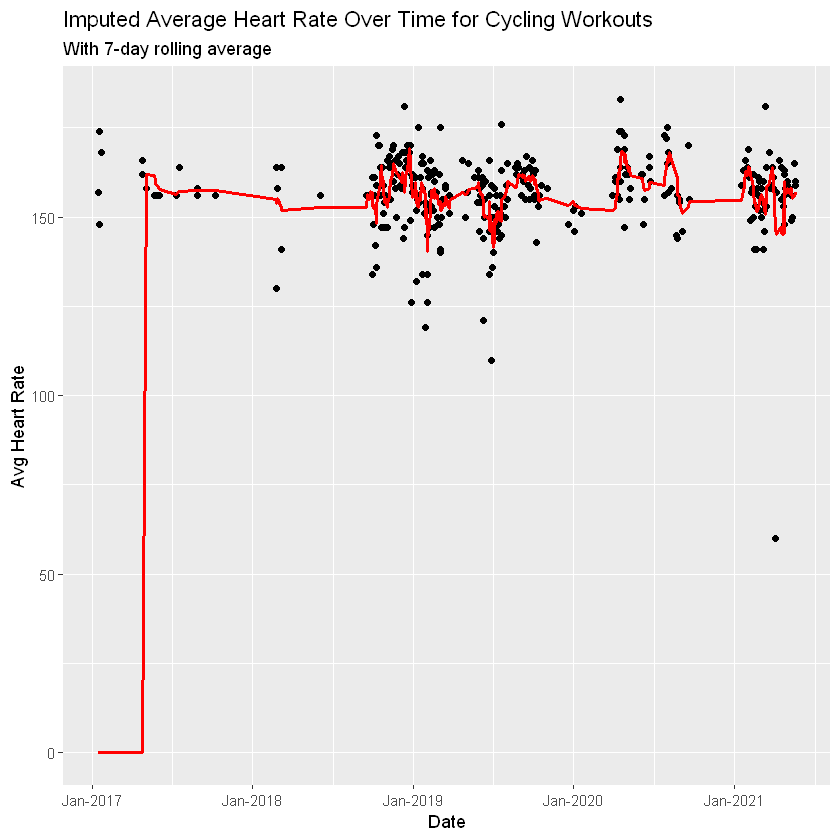

In [ ]:
df %>% 
    filter(fitness_discipline == 'cycling') %>% 
    mutate(rolling_avg= rollmean(new_avg_heart, 7, align="left", fill=0)) %>%
    ggplot(aes(x=date_only, y=new_avg_heart)) +
    geom_point()+
    geom_line(aes(y=rolling_avg), color="red", size=1) +
    scale_x_date(date_labels='%b-%Y') +
    labs(title = 'Imputed Average Heart Rate Over Time for Cycling Workouts', subtitle='With 7-day rolling average', x='Date', y='Avg Heart Rate')

Looking within the clusters of consistent activity indicates that heart rate gradually reduces with the consistent workouts. After the lapse of activity due to surgeries, heart rate was consistency higher than before which makes sense due the time off from working out and the events the body endured through the break.  With the most recent cluster of consistent excercise, the average heart rate is observed to gradually decrease again.

Warning message:
"Removed 1 rows containing missing values (geom_point)."

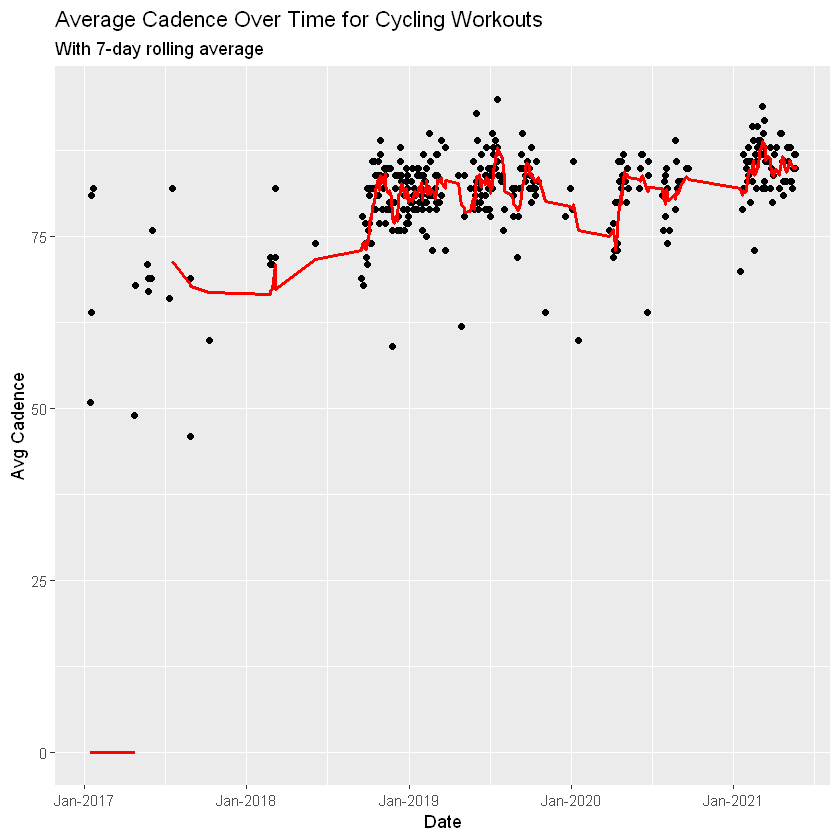

In [ ]:
df %>% 
    filter(fitness_discipline == 'cycling') %>% 
    mutate(rolling_avg= rollmean(avg_cadence, 7, align="left", fill=0)) %>%
    ggplot(aes(x=date_only, y=avg_cadence)) +
    geom_point()+
    geom_line(aes(y=rolling_avg), color="red", size=1) +
    scale_x_date(date_labels='%b-%Y') +
    labs(title = 'Average Cadence Over Time for Cycling Workouts', subtitle='With 7-day rolling average', x='Date', y='Avg Cadence')

Despite the break in workout consistency, average cadence continued to rise.  

Warning message:
"Removed 1 rows containing missing values (geom_point)."

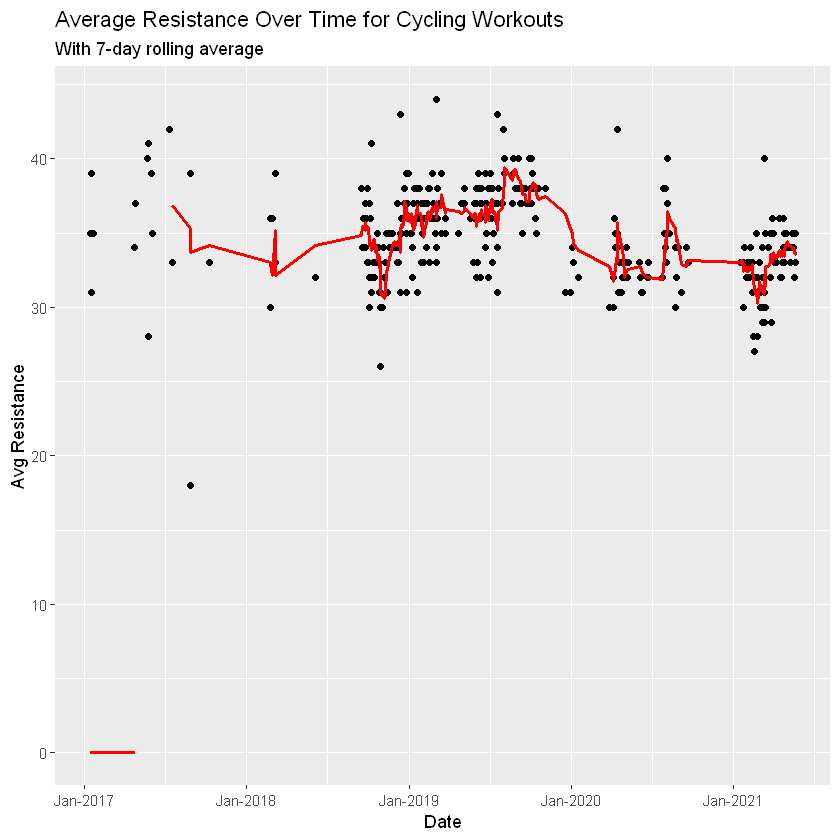

In [ ]:
df %>% 
    filter(fitness_discipline == 'cycling') %>% 
    mutate(rolling_avg= rollmean(avg_resistance, 7, align="left", fill=0)) %>%
    ggplot(aes(x=date_only, y=avg_resistance)) +
    geom_point()+
    geom_line(aes(y=rolling_avg), color="red", size=1) +
    scale_x_date(date_labels='%b-%Y') +
    labs(title = 'Average Resistance Over Time for Cycling Workouts', subtitle='With 7-day rolling average', x='Date', y='Avg Resistance')

Resistance, however, follows the same pattern as average output.  Increases with consistency of activity.  High resistance taxes the leg muscles while higher cadence is taxing on the cardiovascular system.  If someone has not been consistently working the muscles needed for high resistance cycling, their average resistance would be lower.  With the increase in activity, the leg muscles are being strengthened with increases the average resistance that can be sustained during efforts.

Warning message:
"Removed 1 rows containing missing values (geom_point)."

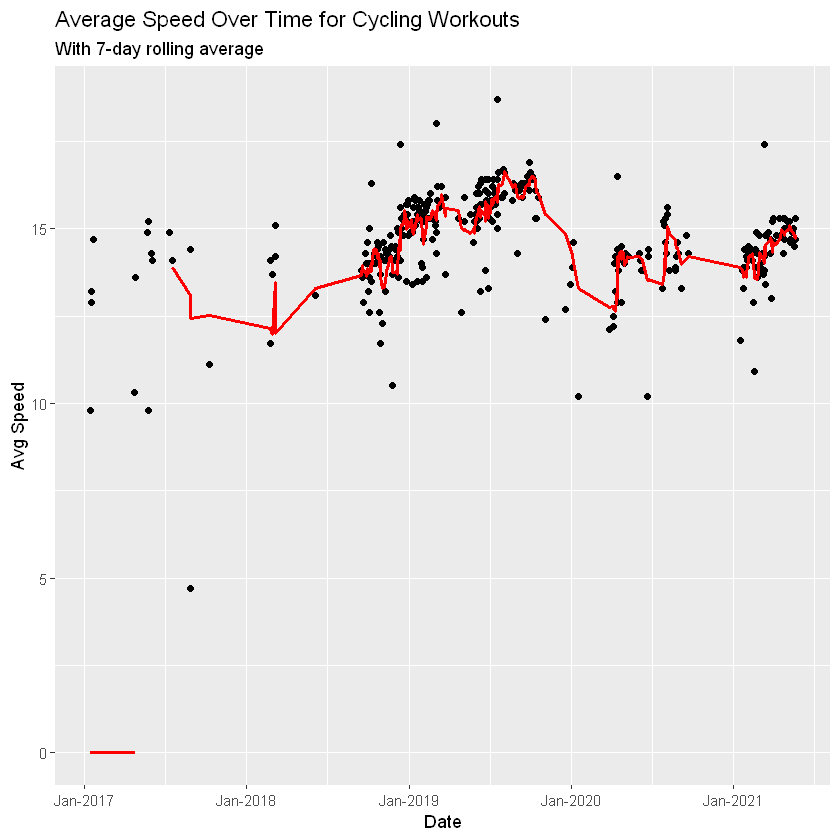

In [ ]:
df %>% 
    filter(fitness_discipline == 'cycling') %>% 
    mutate(rolling_avg= rollmean(avg_speed, 7, align="left", fill=0)) %>%
    ggplot(aes(x=date_only, y=avg_speed)) +
    geom_point()+
    geom_line(aes(y=rolling_avg), color="red", size=1) +
    scale_x_date(date_labels='%b-%Y') +
    labs(title = 'Average Speed Over Time for Cycling Workouts', subtitle='With 7-day rolling average', x='Date', y='Avg Speed')

The pattern in average speed is surprising in that I expected it to mimic cadence, however, it seems to follow the pattern of average output and average resistance.

#### View all average metrics together

In [ ]:
data_wide <- df %>% 
                filter(fitness_discipline=='cycling') %>% 
                select(c('date_only','avg_output', 'avg_resistance', 'avg_cadence','avg_speed','new_avg_heart')) %>%
                mutate(rolling_avg_output = rollmean(avg_output, k = 7,fill=0),
                       rolling_avg_cadence = rollmean(avg_cadence, k = 7, fill=0),
                       rolling_avg_resistance = rollmean(avg_resistance, k = 7, fill = 0),
                       rolling_avg_speed = rollmean(avg_speed, k =7, fill = 0),
                       rolling_avg_heart = rollmean(new_avg_heart, k = 7, fill = 0)) %>%
                select(c('date_only','rolling_avg_output', 'rolling_avg_resistance', 'rolling_avg_cadence','rolling_avg_speed','rolling_avg_heart'))

head(data_wide)

date_only,rolling_avg_output,rolling_avg_resistance,rolling_avg_cadence,rolling_avg_speed,rolling_avg_heart
2021-05-20,0.00000,0.00000,0.00000,0.00000,0.0000
2021-05-19,0.00000,0.00000,0.00000,0.00000,0.0000
2021-05-18,0.00000,0.00000,0.00000,0.00000,0.0000
2021-05-16,82.85714,33.71429,85.28571,14.81429,157.0198
2021-05-13,81.42857,33.57143,85.00000,14.71429,156.6626
2021-05-10,81.42857,33.71429,85.14286,14.78571,156.3683


In [ ]:
data_long<- gather(data_wide, condition, measurement,rolling_avg_output:rolling_avg_heart)
head(data_long)

date_only,condition,measurement
2021-05-20,rolling_avg_output,0.00000
2021-05-19,rolling_avg_output,0.00000
2021-05-18,rolling_avg_output,0.00000
2021-05-16,rolling_avg_output,82.85714
2021-05-13,rolling_avg_output,81.42857
2021-05-10,rolling_avg_output,81.42857


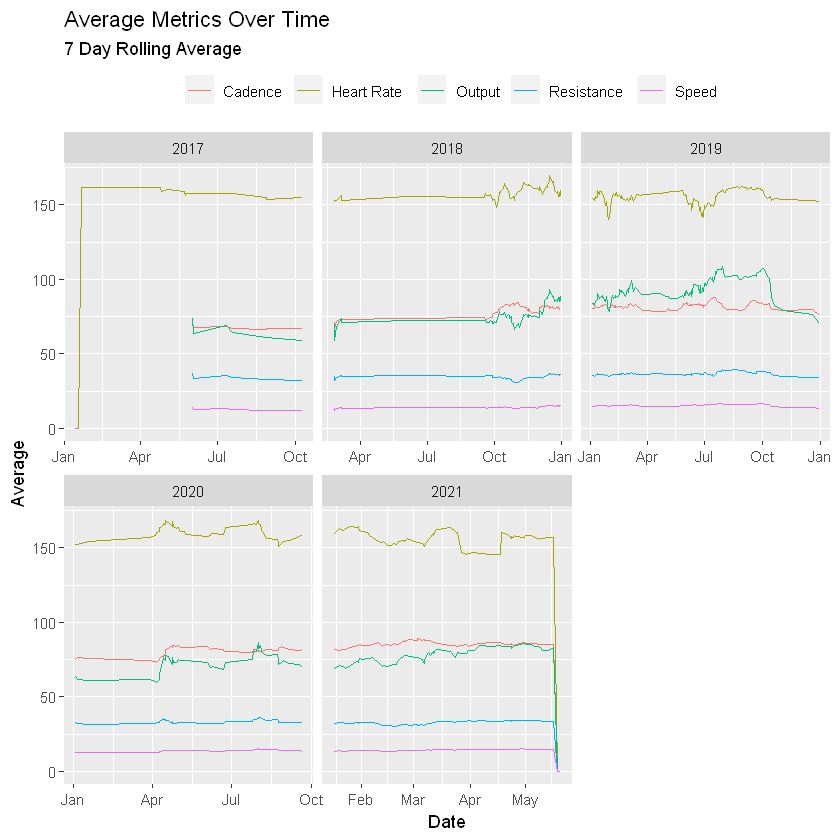

In [ ]:
data_long %>% 
    ggplot(aes(x=date_only, y=measurement, color=condition)) +
    geom_line() +
    scale_x_date(date_labels='%b') +
    labs(title = 'Average Metrics Over Time', subtitle='7 Day Rolling Average', x='Date', y='Average') +
    facet_wrap(~format(date_only, format='%Y'), scales='free_x') +
    scale_color_discrete(name = element_blank(), labels = c("Cadence", "Heart Rate", "Output","Resistance","Speed")) +
    theme(legend.position="top")

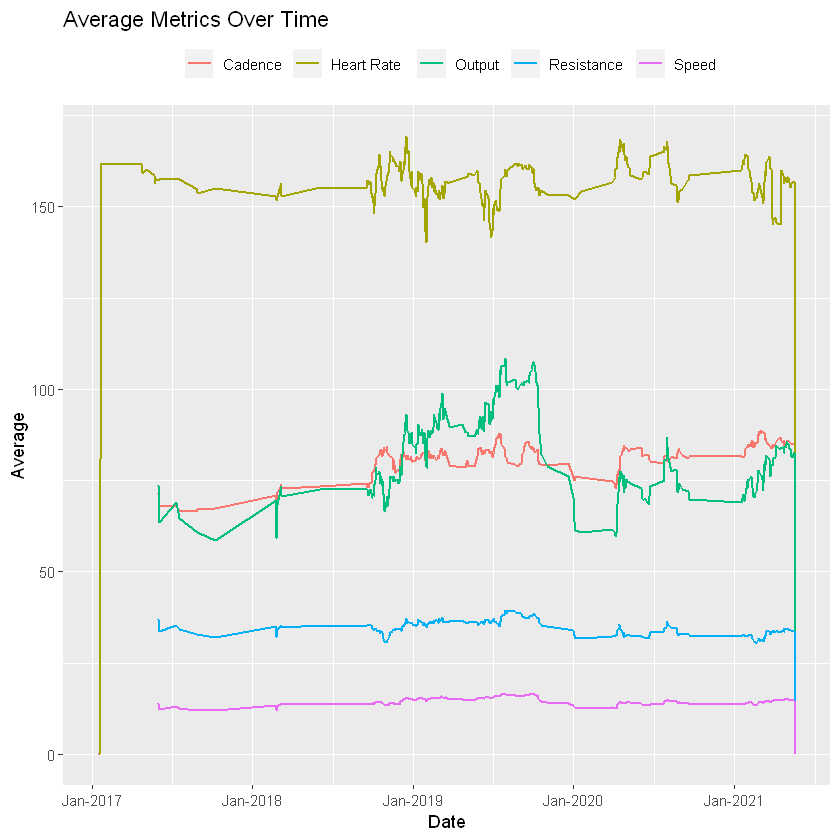

In [ ]:
data_long %>% 
    ggplot(aes(x=date_only, y=measurement, color=condition)) +
    geom_line(size=.8) +
    scale_x_date(date_labels='%b-%Y') +
    labs(title = 'Average Metrics Over Time', x='Date', y='Average', fill='Avg Metric') +
    scale_color_discrete(name = element_blank(), labels = c("Cadence", "Heart Rate", "Output","Resistance","Speed")) +
    theme(legend.position="top")

From the consistent riding time period of late 2018 to 2021, average heart rate has remainded around the same level.  The output dropped between late 2019 and early 2020. During this time period, the participant had health issues that required multiple surgeries.  Since the riding consistency resumed in early 2021, the output has steadily risen.  Consistency is a factor in increasing average output. The peaks in average cadence from late 2018 to 2021 has remained around the same level, however, the valleys are higher indicating that the participant is more consistently riding at higher cadences.  Average resistance and speed has remained the approximately the same.

#### Viewing without rolling average.

In [ ]:
data_wide <- df %>% 
                filter(fitness_discipline=='cycling') %>% 
                select(c('date_only','avg_output', 'avg_resistance', 'avg_cadence','avg_speed','avg_heart'))


In [ ]:
data_long<- gather(data_wide, condition, measurement,avg_output:avg_heart)
head(data_long)

date_only,condition,measurement
2021-05-20,avg_output,89
2021-05-19,avg_output,88
2021-05-18,avg_output,77
2021-05-16,avg_output,84
2021-05-13,avg_output,82
2021-05-10,avg_output,80


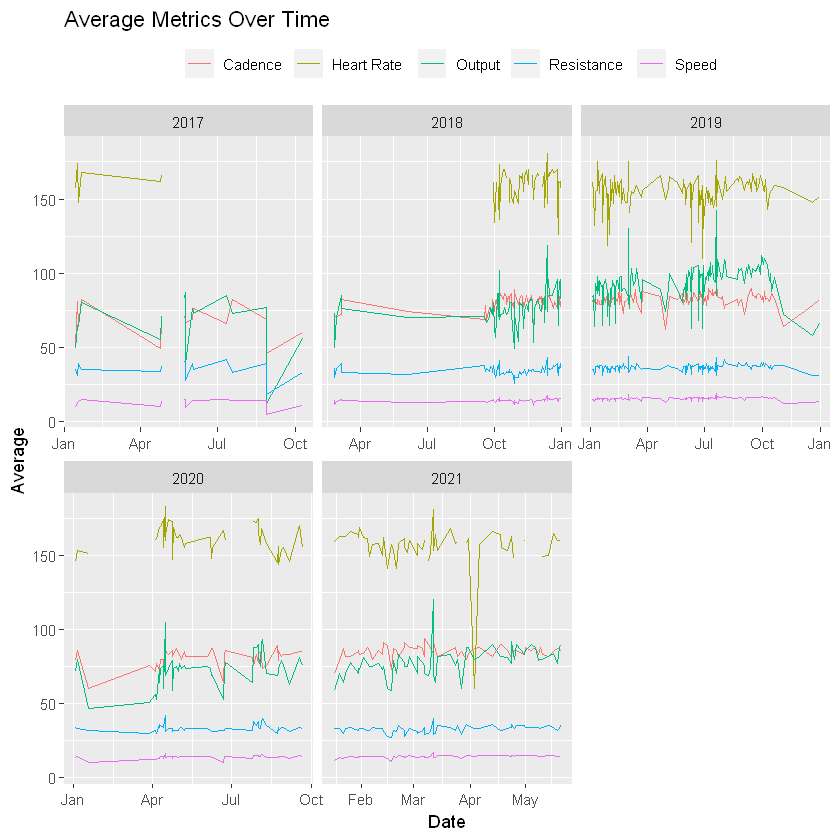

In [ ]:
data_long %>% 
    ggplot(aes(x=date_only, y=measurement, color=condition)) +
    geom_line() +
    scale_x_date(date_labels='%b') +
    labs(title = 'Average Metrics Over Time', x='Date', y='Average') +
    facet_wrap(~format(date_only, format='%Y'), scales='free_x') +
    scale_color_discrete(name = element_blank(), labels = c("Cadence", "Heart Rate", "Output","Resistance","Speed")) +
    theme(legend.position="top")

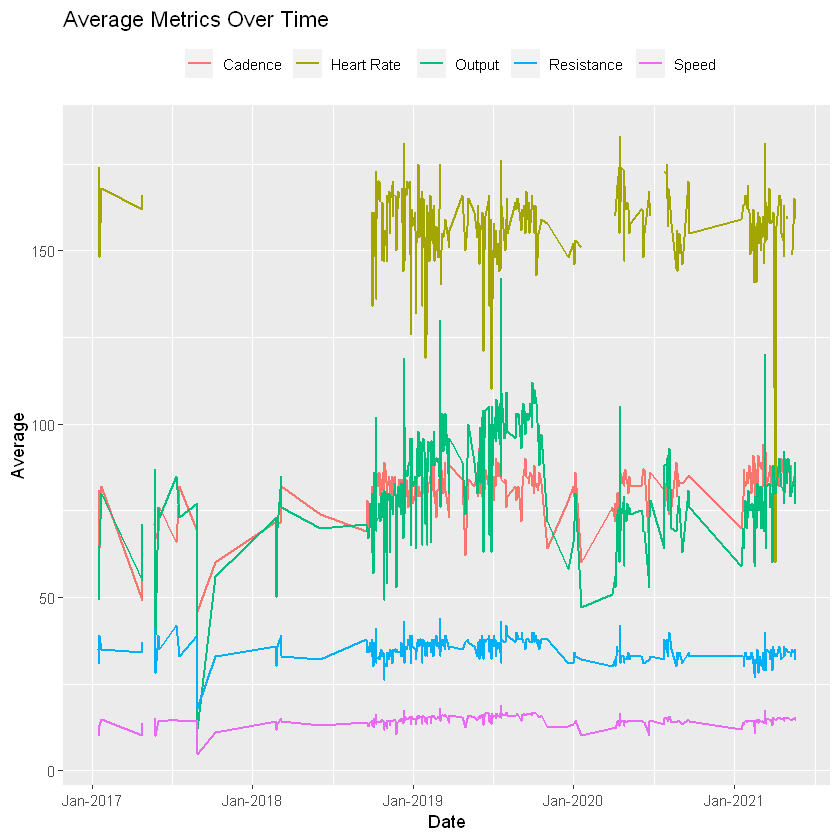

In [ ]:
data_long %>% 
    ggplot(aes(x=date_only, y=measurement, color=condition)) +
    geom_line(size=.8) +
    scale_x_date(date_labels='%b-%Y') +
    labs(title = 'Average Metrics Over Time', x='Date', y='Average', fill='Avg Metric') +
    scale_color_discrete(name = element_blank(), labels = c("Cadence", "Heart Rate", "Output","Resistance","Speed")) +
    theme(legend.position="top")

#### View Total Metrics Together

In [ ]:
data_wide <- df %>% 
                filter(fitness_discipline=='cycling') %>% 
                select(c('date_only','total_output', 'total_distance', 'total_calories')) %>%
                mutate(rolling_total_output = rollmean(total_output, k = 6,fill=0),
                       rolling_total_distance = rollmean(total_distance, k = 6, fill=0),
                       rolling_total_calories = rollmean(total_calories, k = 6, fill = 0)) %>%
                select(c('date_only','rolling_total_output', 'rolling_total_distance', 'rolling_total_calories'))

head(data_wide)

date_only,rolling_total_output,rolling_total_distance,rolling_total_calories
2021-05-20,0.0000,0.00000,0.0000
2021-05-19,0.0000,0.00000,0.0000
2021-05-18,239.8333,11.78167,547.6667
2021-05-16,210.3333,10.45833,467.0000
2021-05-13,230.0000,11.65500,468.3333
2021-05-10,246.5000,12.34500,469.5000


In [ ]:
data_long<- gather(data_wide, condition, measurement,rolling_total_output:rolling_total_calories)
head(data_long)

date_only,condition,measurement
2021-05-20,rolling_total_output,0.0000
2021-05-19,rolling_total_output,0.0000
2021-05-18,rolling_total_output,239.8333
2021-05-16,rolling_total_output,210.3333
2021-05-13,rolling_total_output,230.0000
2021-05-10,rolling_total_output,246.5000


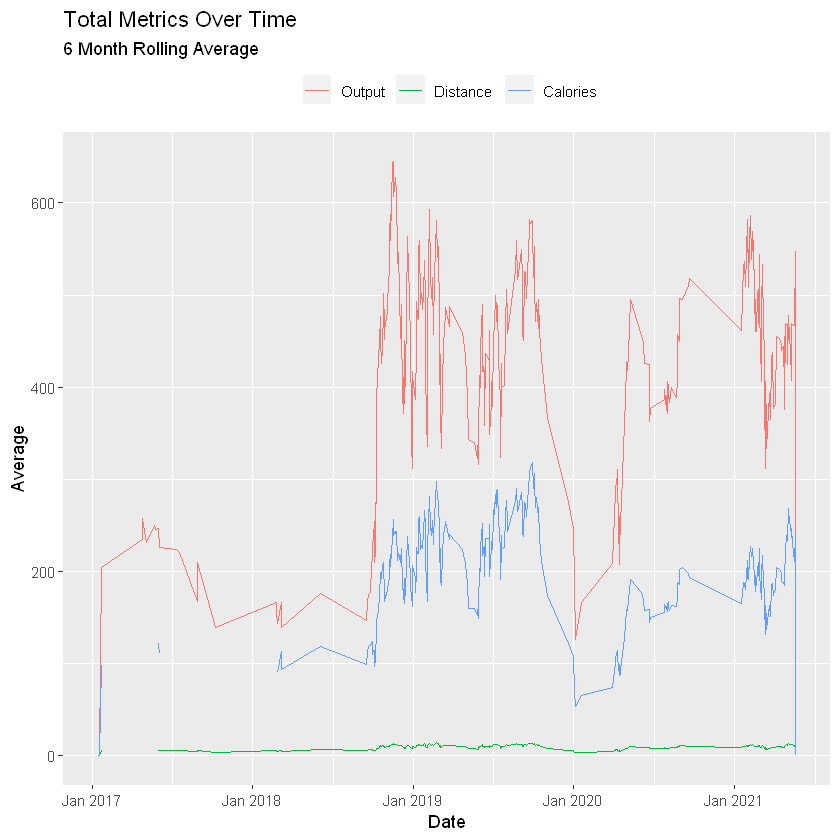

In [ ]:
data_long %>% 
    ggplot(aes(x=date_only, y=measurement, color=condition)) +
    geom_line() +
    scale_x_date(date_labels='%b %Y') +
    labs(title = 'Total Metrics Over Time', subtitle='6 Month Rolling Average', x='Date', y='Average') +
    scale_color_discrete(name = element_blank(), labels = c("Output", "Distance", "Calories")) +
    theme(legend.position="top")

Total Output and Total calories time series mimic the growth and distribution of the average output.  For any modeling, all of these fields aren't required.  View distance alone to see the trends.

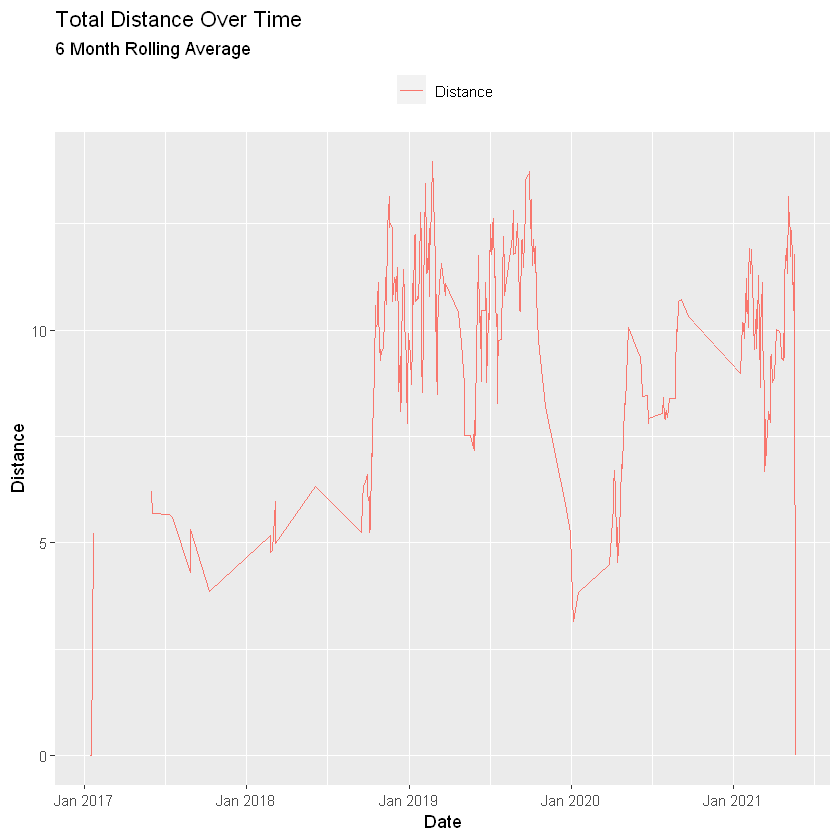

In [ ]:
data_long %>% filter(condition=='rolling_total_distance') %>%
    ggplot(aes(x=date_only, y=measurement, color=condition)) +
    geom_line() +
    scale_x_date(date_labels='%b %Y') +
    labs(title = 'Total Distance Over Time', subtitle='6 Month Rolling Average', x='Date', y='Distance') +
    scale_color_discrete(name = element_blank(), labels = c("Distance")) +
    theme(legend.position="top")

Total distance also produces a similar appearing line.

#### Max Metrics Over Time

In [ ]:
data_wide <- df %>% 
                filter(fitness_discipline=='cycling') %>% 
                select(c('date_only','max_output', 'max_heart', 'max_resist', 'max_cadence','max_speed')) %>%
                mutate(rolling_max_output = rollmean(max_output, k = 6,fill=0),
                       rolling_max_heart = rollmean(max_heart, k = 6, fill=0),
                       rolling_max_resist = rollmean(max_resist, k = 6, fill = 0),
                      rolling_max_cadence = rollmean(max_cadence, k = 6, fill = 0),
                      rolling_max_speed = rollmean(max_speed, k = 6, fill = 0)) %>%
                select(c('date_only','rolling_max_output', 'rolling_max_heart', 'rolling_max_resist', 'rolling_max_cadence','rolling_max_speed'))

head(data_wide)

date_only,rolling_max_output,rolling_max_heart,rolling_max_resist,rolling_max_cadence,rolling_max_speed
2021-05-20,0.0000,0,0.00000,0.0000,0.00000
2021-05-19,0.0000,0,0.00000,0.0000,0.00000
2021-05-18,131.6667,175,43.16667,115.3333,18.11667
2021-05-16,127.8333,NA,41.66667,115.0000,17.90000
2021-05-13,128.3333,NA,41.33333,114.5000,17.93333
2021-05-10,132.1667,NA,42.00000,114.1667,18.16667


In [ ]:
data_long<- gather(data_wide, condition, measurement,rolling_max_output:rolling_max_speed)
head(data_long)

date_only,condition,measurement
2021-05-20,rolling_max_output,0.0000
2021-05-19,rolling_max_output,0.0000
2021-05-18,rolling_max_output,131.6667
2021-05-16,rolling_max_output,127.8333
2021-05-13,rolling_max_output,128.3333
2021-05-10,rolling_max_output,132.1667


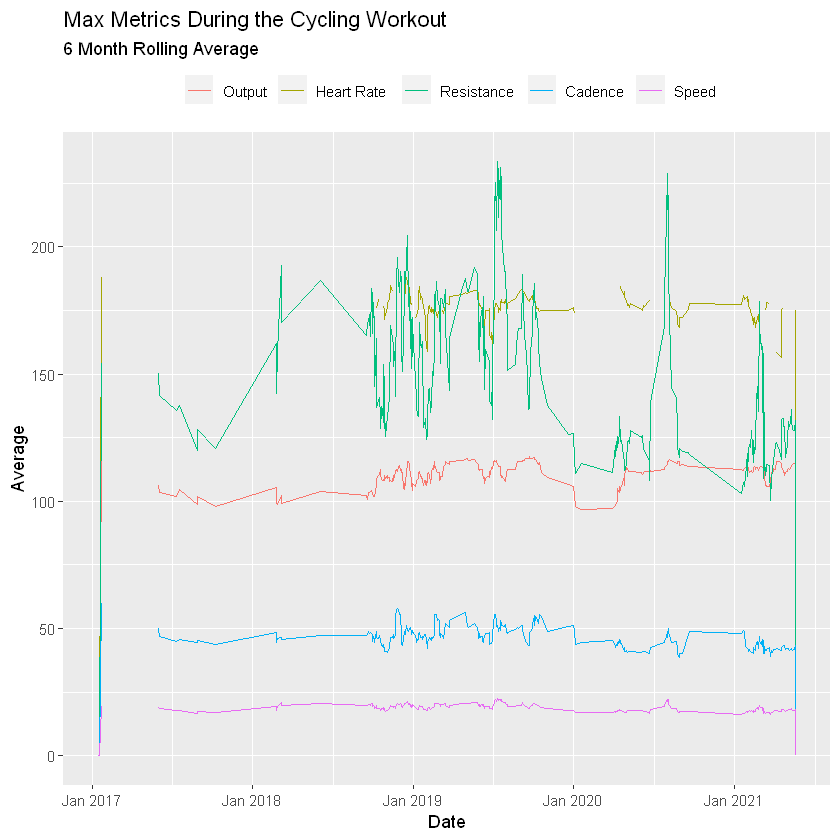

In [ ]:
data_long %>% 
    ggplot(aes(x=date_only, y=measurement, color=condition)) +
    geom_line() +
    scale_x_date(date_labels='%b %Y') +
    labs(title = 'Max Metrics During the Cycling Workout', subtitle='6 Month Rolling Average', x='Date', y='Average') +
    scale_color_discrete(name = element_blank(), labels = c('Output', 'Heart Rate', 'Resistance', 'Cadence','Speed')) +
    theme(legend.position="top")

Max Resistance follows the same pattern as the average output and total metrics.  What is interesting is the max output during the ride remains level even throught the average output took a dip between 2019 and 2020.  Max heart rate, resistance and speed seems to remain the same.  

### Power Zone Rides

In [ ]:
df %>% filter(fitness_discipline == 'cycling') %>% group_by(Power.Zone) %>% summarise(n=n())

`summarise()` ungrouping output (override with `.groups` argument)


Power.Zone,n
False,99
True,230


`summarise()` ungrouping output (override with `.groups` argument)


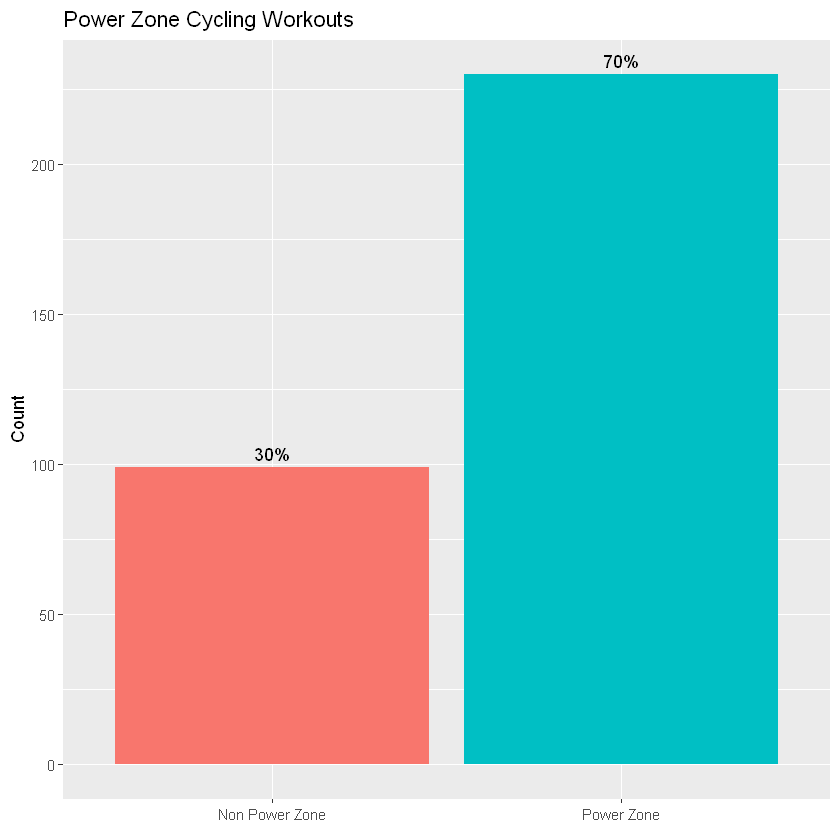

In [ ]:
df %>% filter(fitness_discipline == 'cycling') %>% group_by(Power.Zone) %>% summarise(n=n()) %>%
    ggplot(aes(x = Power.Zone, y=n, fill=Power.Zone)) +
    geom_col() + 
    geom_text(aes(label=scales::percent(n/sum(n))), vjust=-.5) +
    labs(title = 'Power Zone Cycling Workouts', x=element_blank(), y='Count') +
    theme(legend.position = "none") +
    scale_x_discrete(labels=c('Non Power Zone','Power Zone'))

Power Zone Rides represent twice as many cycling workouts as non power zone workouts.  If we use this in modeling, they will need to be balanced.

Warning message:
"Removed 1 rows containing missing values (geom_point)."

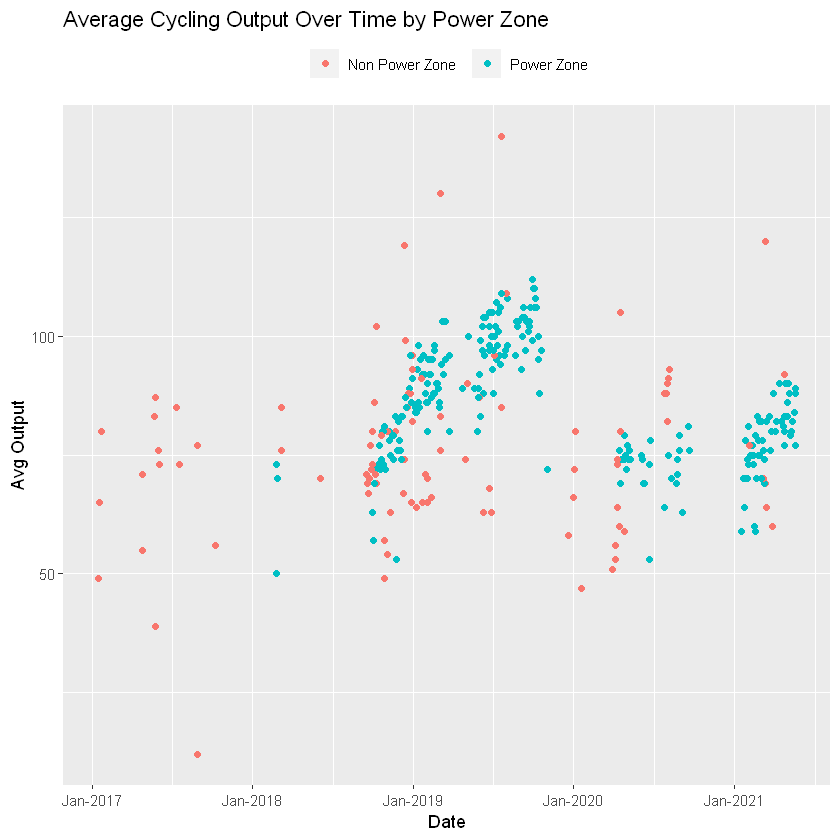

In [ ]:
#view output plotted with power zone as a color.
df %>% 
    filter(fitness_discipline == 'cycling') %>% 
    ggplot(aes(x=date_only, y=avg_output, color=Power.Zone)) +
    geom_point() +
    scale_x_date(date_labels='%b-%Y') +
    labs(title = 'Average Cycling Output Over Time by Power Zone',  x='Date', y='Avg Output') +
    scale_color_discrete(name = element_blank(), labels = c('Non Power Zone', 'Power Zone')) +
     theme(legend.position="top")

This graph shows higher output in some non pz rids however the output is more consistent with power zone rides and they are more tightly clustered.  It is hard to tell whether power zone rides or non powerzone rides have the best average output.

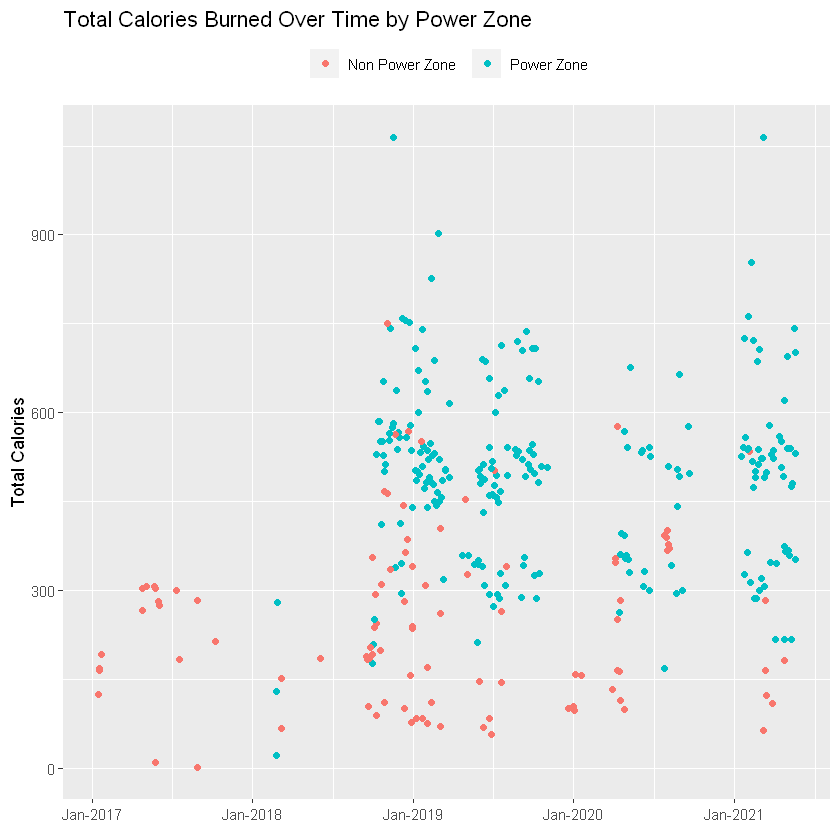

In [ ]:
#view output plotted with power zone as a color.
df %>% 
    filter(fitness_discipline == 'cycling') %>% 
    ggplot(aes(x=date_only, y=total_calories, color=Power.Zone)) +
    geom_point() +
    scale_x_date(date_labels='%b-%Y') +
    labs(title = 'Total Calories Burned Over Time by Power Zone',  x=element_blank(), y='Total Calories') +
    scale_color_discrete(name = element_blank(), labels = c('Non Power Zone', 'Power Zone')) +
     theme(legend.position="top")

This graph is more obviously showing that power zone rides burn more calories than non pz rides.  This could also be because the power zone rides are more frequently 45 and 60 minutes while non pz rides can range from 10-30 minutes.

In [ ]:
#view mean metrics for power zone vs non power zone rides

data_wide <- df %>% 
                filter(fitness_discipline=='cycling') %>% 
                group_by(Power.Zone) %>%
                summarise(mean_output = mean(total_output),
                       mean_max_cadence = mean(max_cadence),
                       mean_max_resistance = mean(max_resist),
                       mean_max_speed = mean(max_speed),
                       mean_max_heart = mean(max_heart),
                       mean_calories = mean(total_calories),
                       mean_distance = mean(total_distance))
 
head(data_wide)


`summarise()` ungrouping output (override with `.groups` argument)


Power.Zone,mean_output,mean_max_cadence,mean_max_resistance,mean_max_speed,mean_max_heart,mean_calories,mean_distance
False,NA,NA,NA,NA,NA,245.9798,NA
True,230.187,112.8348,46.32609,18.88391,NA,494.4304,11.13057


In [ ]:
data_long<- gather(data_wide, condition, measurement,mean_output:mean_distance)
head(data_long)

Power.Zone,condition,measurement
False,mean_output,NA
True,mean_output,230.18696
False,mean_max_cadence,NA
True,mean_max_cadence,112.83478
False,mean_max_resistance,NA
True,mean_max_resistance,46.32609


Warning message:
"Removed 7 rows containing missing values (geom_col)."

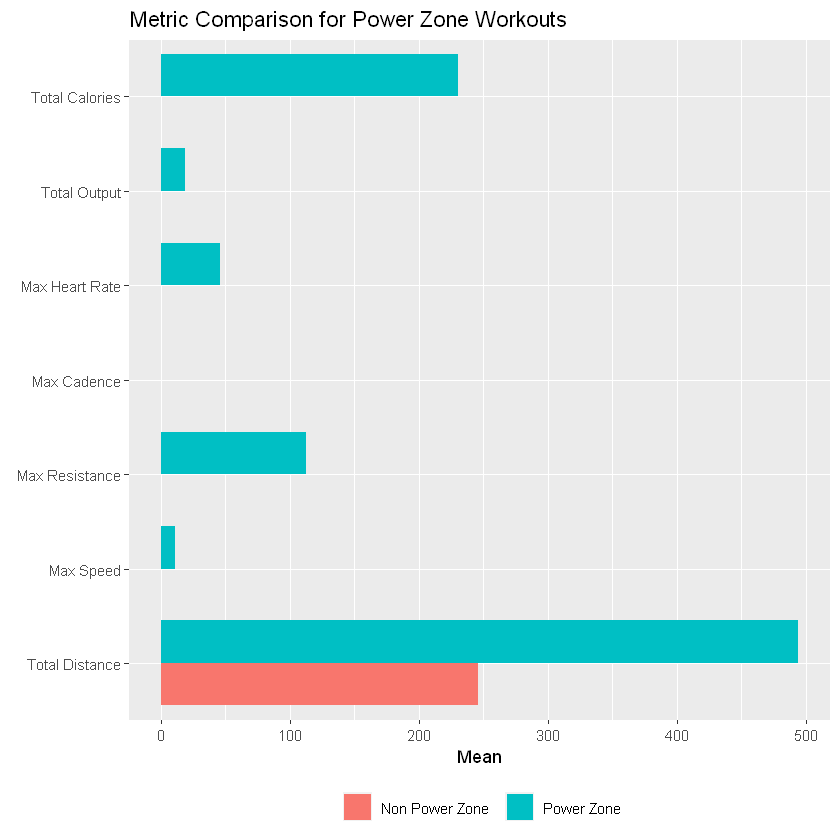

In [ ]:
data_long %>% 
    ggplot(aes(x = reorder(condition, measurement), y=measurement, fill=Power.Zone)) +
    geom_col(position='dodge') + 
    labs(title = 'Metric Comparison for Power Zone Workouts', x=element_blank(), y='Mean') +
    scale_fill_discrete(name = element_blank(), labels = c('Non Power Zone', 'Power Zone')) +
    theme(legend.position = "bottom") +
    scale_x_discrete(labels = c( "Total Distance", "Max Speed", "Max Resistance", "Max Cadence", "Max Heart Rate",  "Total Output", "Total Calories")) +
    coord_flip()

`summarise()` regrouping output by 'duration' (override with `.groups` argument)


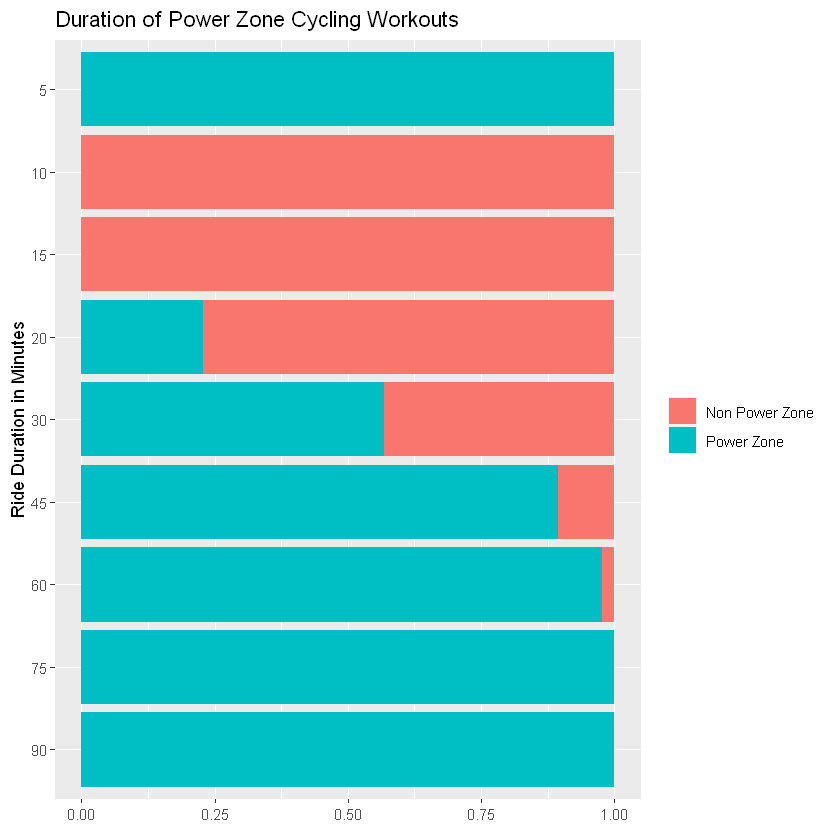

In [ ]:
#view the distribution of duration for pz vs non pz
df %>%  filter(fitness_discipline == 'cycling') %>% group_by(duration, Power.Zone) %>% summarise(n=n()) %>%
    ggplot(aes(x = duration, y=n, fill=Power.Zone)) +
    geom_col(position='fill') + 
    labs(title = 'Duration of Power Zone Cycling Workouts', x='Ride Duration in Minutes', y=element_blank()) +
    scale_fill_discrete(name = element_blank(), labels = c('Non Power Zone', 'Power Zone')) +
    scale_x_discrete(limits = rev(levels(df$duration))) +
    coord_flip()

The max and total metrics for power zone rides tends to be higher because the non px rides are a lower duration.  Because we don't have more comparable durations 
for non power zone rides, power zone would no be a good predictor for any target variables and may skew the results.

#### Replot using the average metrics

In [ ]:
data_wide <- df %>% 
                filter(fitness_discipline=='cycling') %>% 
                group_by(Power.Zone) %>%
                summarise(mean_output = mean(avg_output, na.rm=TRUE),
                       mean_cadence = mean(avg_cadence, na.rm=TRUE),
                       mean_resistance = mean(avg_resistance, na.rm=TRUE),
                       mean_speed = mean(avg_speed, na.rm=TRUE),
                       mean_heart = mean(new_avg_heart, na.rm=TRUE))
 
head(data_wide)


`summarise()` ungrouping output (override with `.groups` argument)


Power.Zone,mean_output,mean_cadence,mean_resistance,mean_speed,mean_heart
False,75.65306,77.20408,34.68367,14.01224,155.4189
True,85.36957,83.09130,34.82174,14.91609,157.2213


In [ ]:
data_long<- gather(data_wide, condition, measurement,mean_output:mean_heart)
head(data_long)

Power.Zone,condition,measurement
False,mean_output,75.65306
True,mean_output,85.36957
False,mean_cadence,77.20408
True,mean_cadence,83.09130
False,mean_resistance,34.68367
True,mean_resistance,34.82174


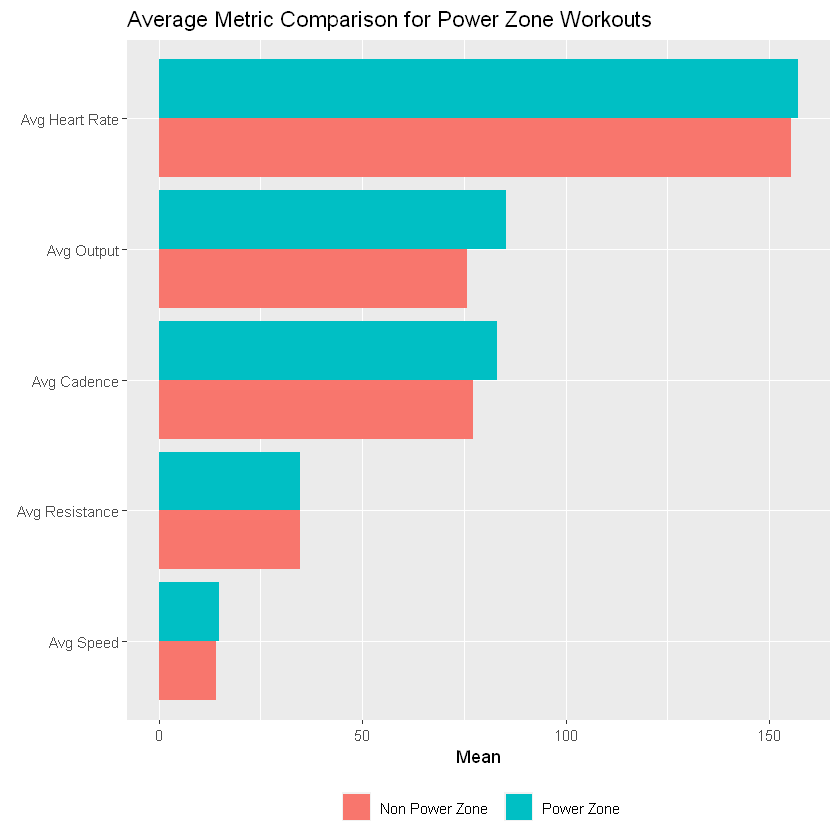

In [ ]:
data_long %>% 
    ggplot(aes(x = reorder(condition, measurement), y=measurement, fill=Power.Zone)) +
    geom_col(position='dodge') + 
    labs(title = 'Average Metric Comparison for Power Zone Workouts', x=element_blank(), y='Mean') +
    scale_fill_discrete(name = element_blank(), labels = c('Non Power Zone', 'Power Zone')) +
    theme(legend.position = "bottom") +
    scale_x_discrete(labels = c("Avg Speed", "Avg Resistance", "Avg Cadence",  "Avg Output", "Avg Heart Rate")) +
    coord_flip()

### Discrete Time Values and Metrics

In [ ]:
#average output by hour
#average output by weekday
# using the average output in the plots to remove any skew that longer durations can have on the data.

data_wide <- df %>% 
                filter(fitness_discipline=='cycling') %>% 
                group_by(hour) %>%
                summarise(avg_output = mean(avg_output),
                       avg_cadence = mean(avg_cadence),
                       avg_resistance = mean(avg_resistance),
                       avg_heart = mean(avg_heart),
                       avg_calories = mean(total_calories))
 
data_wide


`summarise()` ungrouping output (override with `.groups` argument)


hour,avg_output,avg_cadence,avg_resistance,avg_heart,avg_calories
4,89.66667,84.00000,35.00000,143.1667,339.3333
5,91.27273,83.45455,35.90909,158.3636,432.8182
6,68.50000,71.50000,36.50000,NA,184.0000
7,72.00000,76.75000,34.75000,NA,386.5000
8,83.75000,79.25000,35.37500,NA,370.3750
9,79.66667,81.50000,34.20833,NA,427.9167
10,80.63333,78.23333,35.53333,NA,368.2333
11,80.53488,80.90698,34.48837,NA,481.5814
12,NA,NA,NA,NA,367.8696
13,80.50000,79.70000,35.15000,NA,405.1500


In [ ]:
data_long<- gather(data_wide, condition, measurement,avg_output:avg_calories)
head(data_long)

hour,condition,measurement
4,avg_output,89.66667
5,avg_output,91.27273
6,avg_output,68.50000
7,avg_output,72.00000
8,avg_output,83.75000
9,avg_output,79.66667


Warning message:
"Removed 1 rows containing missing values (position_stack)."

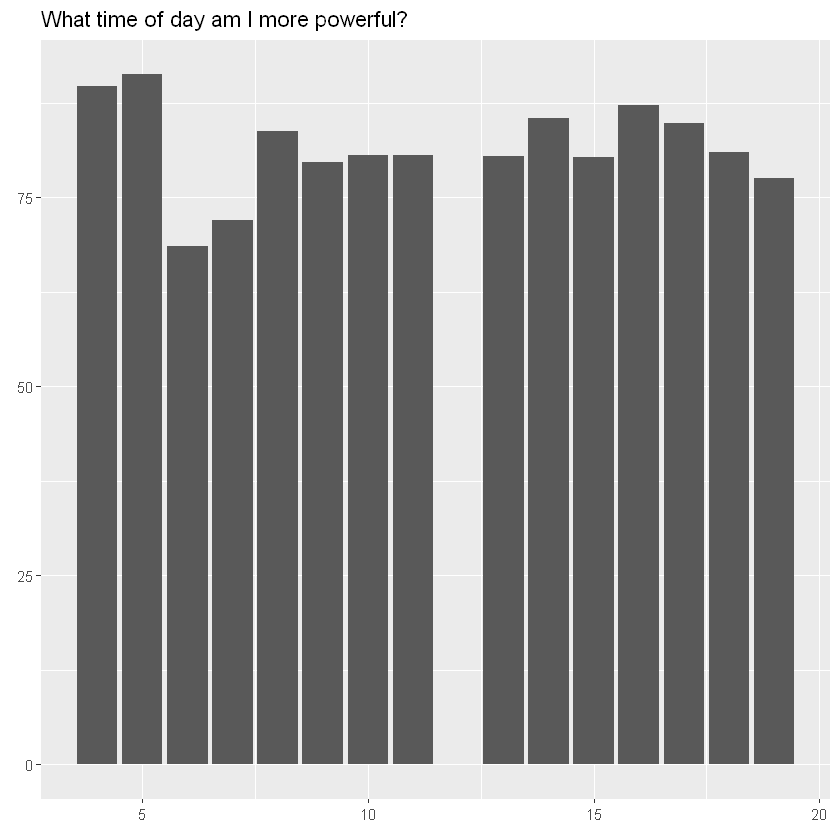

In [ ]:
data_long %>% filter(condition=='avg_output') %>%
    ggplot(aes(x = hour, y=measurement)) +
    geom_col() +
    labs(title = 'What time of day am I more powerful?', x=element_blank(), y=element_blank()) 
   

I'm not sure about my time of day conversions.  I don't do many 4 or 5 am rides. I'm going to exclude this variable for any modeling.

### Plot total output for the day with time series of weight overlaying

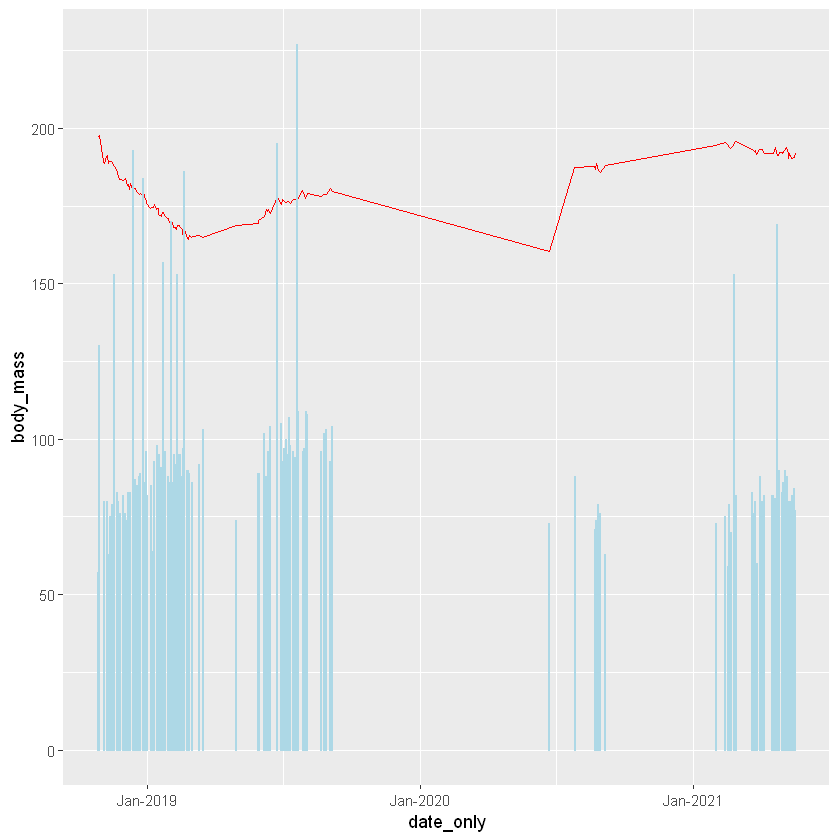

In [ ]:
df %>% filter(fitness_discipline=='cycling')  %>% drop_na(body_mass) %>%
    ggplot(aes(x=date_only)) +
    geom_line(aes(y=body_mass), color="red") +
    geom_col(aes(y=avg_output), color="light blue") +
    scale_x_date(date_labels='%b-%Y')
   # geom_smooth(method='lm')

There is an anomaly around June 2020.  I did not weigh 160 at that time.  I will need to drop this record from the data.

In [ ]:
df %>% filter(fitness_discipline=='cycling' & body_mass < 170 & year >='2020')  %>% drop_na(body_mass)

fitness_discipline,is_total_work_personal_record,start_time,difficulty_estimate,duration,instructor_name,avg_output,avg_cadence,avg_resistance,avg_speed,...,Power.Zone,month,year,weekday,hour,date_only,percent_leaderboard_rank,body_mass,lean_body_mass,new_avg_heart
cycling,False,2020-06-22 17:00:23-05:00,6.8309,45,Christine D'Ercole,73,84,32,14.2,...,True,6,2020,NA,16,2020-06-22,10.38334,160.48,124.68,164


In [ ]:
df = df[df$date_only != '2020-06-22',]

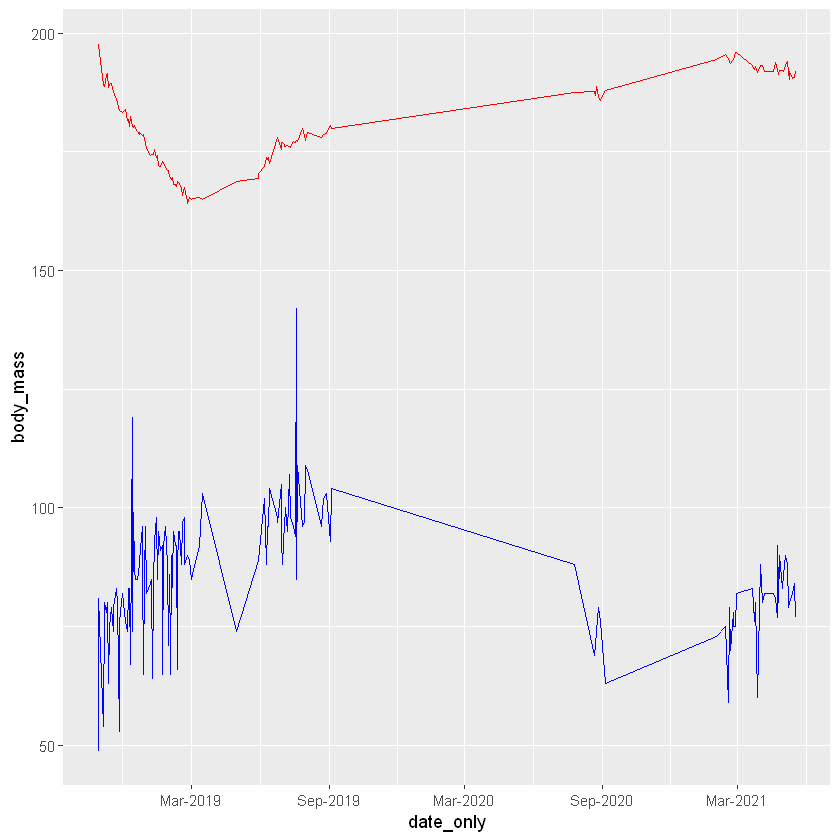

In [ ]:
df %>% filter(fitness_discipline=='cycling')  %>% drop_na(body_mass) %>%
    ggplot(aes(x=date_only)) +
    geom_line(aes(y=body_mass), color="red") +
    geom_line(aes(y=avg_output), color="blue") +
    scale_x_date(date_breaks='6 months', date_labels='%b-%Y')
   # geom_smooth(method='lm')

This plot shows that when I"m riding consistently, weight decreases.

Warning message:
"Removed 11 row(s) containing missing values (geom_path)."Warning message:
"Removed 11 row(s) containing missing values (geom_path)."

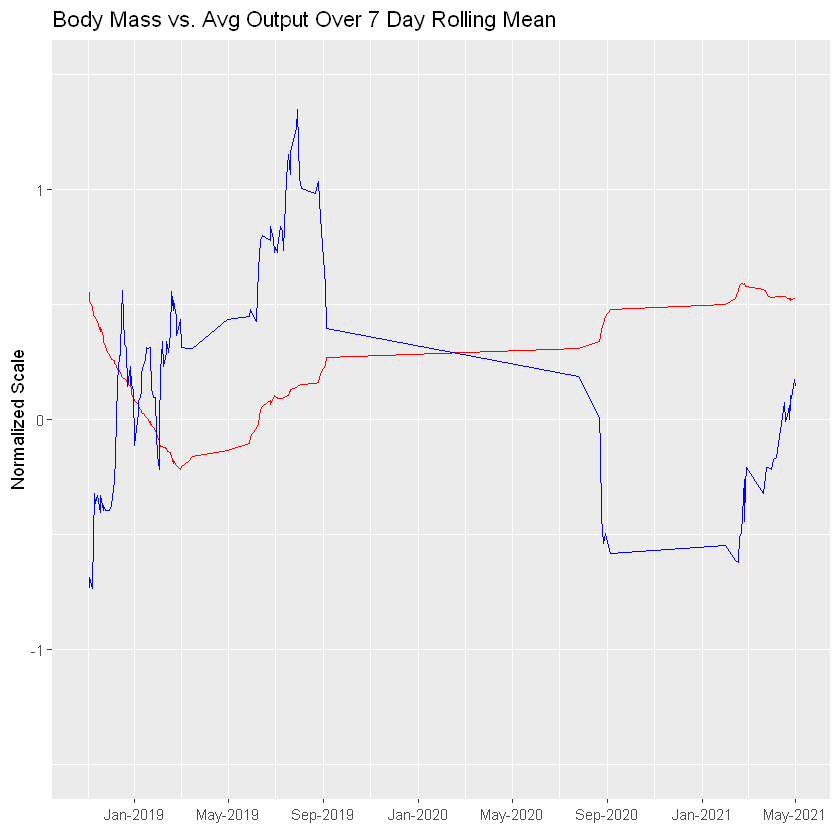

In [ ]:
## plot again but scale the data
df %>% filter(fitness_discipline=='cycling')  %>% drop_na(body_mass) %>%
    mutate(body_mass_scaled = scale(rollmean(body_mass, k = 7,fill=0)),
          avg_output_scaled = scale(rollmean(avg_output, k = 7,fill=0))) %>%
    ggplot(aes(x=date_only)) +
    geom_line(aes(y=body_mass_scaled), color="red") +
    geom_line(aes(y=avg_output_scaled), color="blue") +
    scale_x_date(date_breaks='4 months', date_labels='%b-%Y', limits=as.Date(c('2018-11-01','2021-05-01'))) +
    scale_y_continuous(limits=c(-1.5,1.5)) +
    scale_color_manual(name="Scaled Metrics",values=c('Body Mass', 'Avg Output')) +
    labs(title = 'Body Mass vs. Avg Output Over 7 Day Rolling Mean', x=element_blank(), y='Normalized Scale') 
   # geom_smooth(method='lm')

In [ ]:
data_wide <- df %>% 
                filter(fitness_discipline=='cycling') %>% 
                select(c('date_only','avg_output', 'body_mass', 'lean_body_mass')) %>%
                drop_na(body_mass, lean_body_mass) %>%
                mutate(body_mass_mean = scale(rollmean(body_mass,k = 7,fill=0)),
                          avg_output_mean = scale(rollmean(avg_output, k=7, fill=0)),
                          lean_body_mass_mean = scale(rollmean(lean_body_mass, k=7, fill=0))) %>%
                select(c('date_only','avg_output_mean', 'body_mass_mean', 'lean_body_mass_mean'))

head(data_wide)

date_only,avg_output_mean,body_mass_mean,lean_body_mass_mean
2021-05-18,-4.30458365,-4.7033412,-4.7363205
2021-05-16,-4.30458365,-4.7033412,-4.7363205
2021-05-13,-4.30458365,-4.7033412,-4.7363205
2021-05-10,-0.05027906,0.5102819,-0.2563837
2021-05-09,0.04674894,0.5157249,-0.2553517
2021-05-08,0.06167632,0.5203903,-0.2532877


In [ ]:
data_long<- gather(data_wide, condition, measurement,avg_output_mean:lean_body_mass_mean)
head(data_long)

Warning message:
"attributes are not identical across measure variables;
they will be dropped"

date_only,condition,measurement
2021-05-18,avg_output_mean,-4.30458365
2021-05-16,avg_output_mean,-4.30458365
2021-05-13,avg_output_mean,-4.30458365
2021-05-10,avg_output_mean,-0.05027906
2021-05-09,avg_output_mean,0.04674894
2021-05-08,avg_output_mean,0.06167632


Warning message:
"Removed 18 row(s) containing missing values (geom_path)."

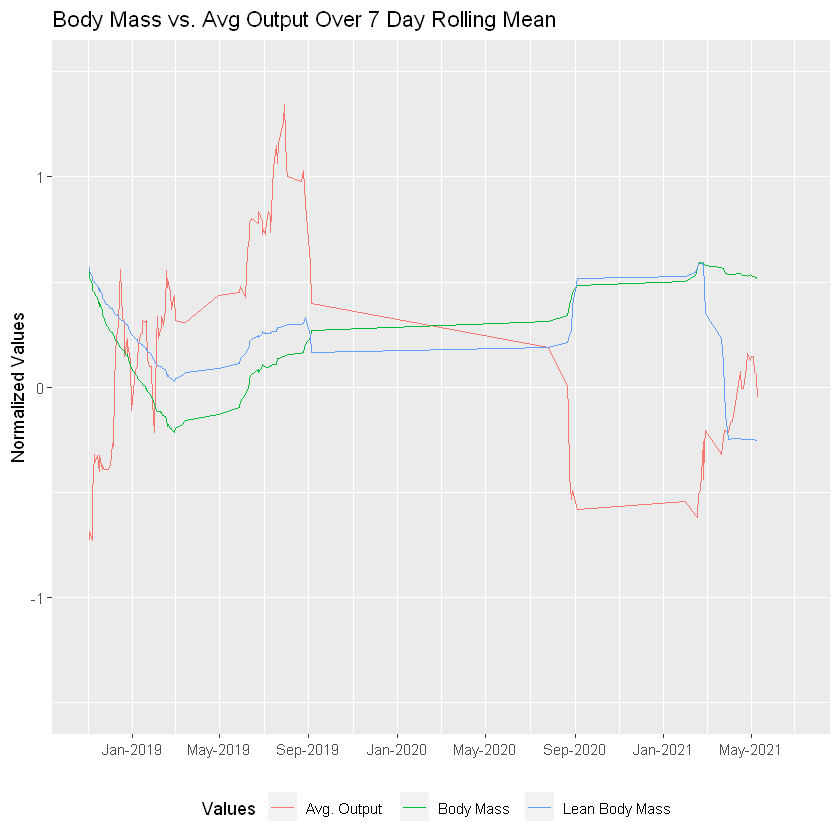

In [ ]:
## plot again but scale the data
data_long %>%
    ggplot(aes(x=date_only, y=measurement, color=condition)) +
    geom_line() +
    scale_x_date(date_breaks='4 months', date_labels='%b-%Y', limits=as.Date(c('2018-11-01','2021-07-01'))) +
    scale_y_continuous(limits=c(-1.5,1.5)) +
    labs(title = 'Body Mass vs. Avg Output Over 7 Day Rolling Mean', x=element_blank(), y='Normalized Values') +
    scale_color_discrete(name="Values", labels=c('Avg. Output','Body Mass','Lean Body Mass')) +
    theme(legend.position="bottom")
   # geom_smooth(method='lm')

### Correlation
Before looking at correlation, I need to create a numerical only dataset and filter it further.  I only want to include cycling data that has associated weight metrics.  I also want to include a change in weight column from the previous day.  I want to exclude the month year and weekday values.  I want to exclude total output and total distance because they have the same distribution as average output. The max cadence, resistance, speed and heartrate are close to the averages so those will also be excluded.  I'm exluding the power zone variable to avoid bias since most power zone rides are longer.  I'm converting duration back to a numeric value.  

In [ ]:
cycle_data <- df %>% filter(fitness_discipline=='cycling') %>% drop_na(body_mass) %>% select(-one_of(
    c('fitness_discipline', 'is_total_work_personal_record', 'instructor_name', 'Power.Zone', 'start_time',
      'month','year','weekday','hour','total_output','total_distance','max_heart','max_output','max_resist',
     'max_cadence','max_speed')))

#set avg heart rate = new average heart rate and drop the new_avg_heart colum
cycle_data$avg_heart <- cycle_data$new_avg_heart
cycle_data <- subset(cycle_data, select=-new_avg_heart)

head(cycle_data)

difficulty_estimate,duration,avg_output,avg_cadence,avg_resistance,avg_speed,total_calories,avg_heart,date_only,percent_leaderboard_rank,body_mass,lean_body_mass
6.1463,30,77,87,32,14.5,353,160.0000,2021-05-18,12.510019,191.8,124.2
7.2753,60,84,85,34,15.0,743,165.0000,2021-05-16,11.474473,190.6,123.8
6.5793,45,82,82,35,14.9,481,150.0000,2021-05-13,11.867078,190.4,123.6
6.6279,45,80,83,34,14.6,476,149.0000,2021-05-10,14.004553,192.0,124.2
6.2681,30,80,88,33,14.7,218,156.1385,2021-05-09,11.351490,190.2,123.6
7.5617,75,79,83,34,14.6,539,156.5000,2021-05-08,9.366463,192.0,124.2


In [ ]:
cycle_data$duration <- as.numeric(cycle_data$duration)

In [ ]:
cor_data <- cycle_data %>% select(where(is.numeric))

In [ ]:
res <- cor(cor_data, method='pearson', use = "complete.obs")
round(res, 2)

,difficulty_estimate,duration,avg_output,avg_cadence,avg_resistance,avg_speed,total_calories,avg_heart,percent_leaderboard_rank,body_mass,lean_body_mass
difficulty_estimate,1.00,0.57,0.62,-0.02,0.45,0.47,0.54,0.47,-0.15,-0.08,0.19
duration,0.57,1.00,0.18,-0.07,0.22,0.17,0.90,0.27,-0.28,0.01,0.04
avg_output,0.62,0.18,1.00,0.12,0.82,0.95,0.17,0.31,0.27,-0.43,-0.11
avg_cadence,-0.02,-0.07,0.12,1.00,-0.40,0.25,-0.08,-0.08,-0.06,0.28,-0.14
avg_resistance,0.45,0.22,0.82,-0.40,1.00,0.78,0.22,0.29,0.31,-0.57,-0.10
avg_speed,0.47,0.17,0.95,0.25,0.78,1.00,0.17,0.27,0.30,-0.42,-0.19
total_calories,0.54,0.90,0.17,-0.08,0.22,0.17,1.00,0.42,-0.16,-0.01,0.15
avg_heart,0.47,0.27,0.31,-0.08,0.29,0.27,0.42,1.00,-0.08,0.06,0.13
percent_leaderboard_rank,-0.15,-0.28,0.27,-0.06,0.31,0.30,-0.16,-0.08,1.00,-0.34,-0.03
body_mass,-0.08,0.01,-0.43,0.28,-0.57,-0.42,-0.01,0.06,-0.34,1.00,0.07


In [ ]:
res2 <- rcorr(as.matrix(cor_data))

In [ ]:
# ++++++++++++++++++++++++++++
# flattenCorrMatrix
# ++++++++++++++++++++++++++++
# cormat : matrix of the correlation coefficients
# pmat : matrix of the correlation p-values
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}

flattenCorrMatrix(res2$r, res2$P)

row,column,cor,p
difficulty_estimate,duration,0.569705007,3.397282e-14
difficulty_estimate,avg_output,0.613670117,0.000000e+00
duration,avg_output,0.181910143,2.639467e-02
difficulty_estimate,avg_cadence,-0.022693827,7.835345e-01
duration,avg_cadence,-0.064083063,4.374868e-01
avg_output,avg_cadence,0.114250224,1.653186e-01
difficulty_estimate,avg_resistance,0.449129064,9.180006e-09
duration,avg_resistance,0.213715502,8.868859e-03
avg_output,avg_resistance,0.816798685,0.000000e+00
avg_cadence,avg_resistance,-0.401099967,3.992477e-07


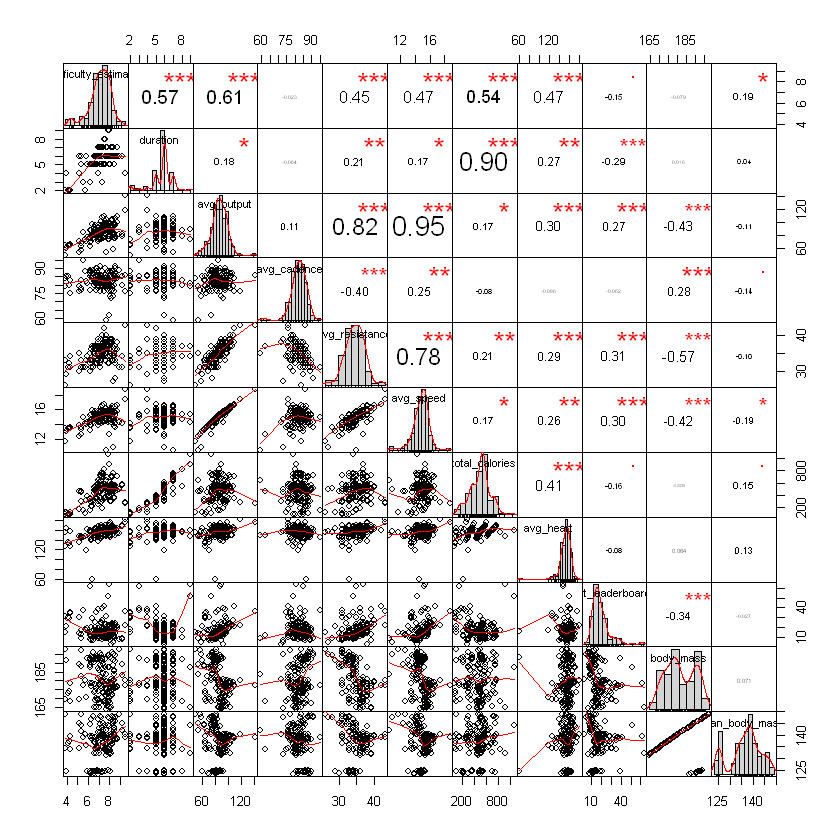

In [ ]:
chart.Correlation(cor_data, histogram=TRUE, pch=19)

In [ ]:
body_mass_diff <- diff(cor_data$body_mass, lag = 1)

In [ ]:
# test = cbind(cor_data, body_mass_diff)
body_mass_diff <- insert(body_mass_diff, 1, values=NA)

In [ ]:
cor_data <- cbind(cor_data, body_mass_diff)

In [ ]:
res2 <- rcorr(as.matrix(cor_data))

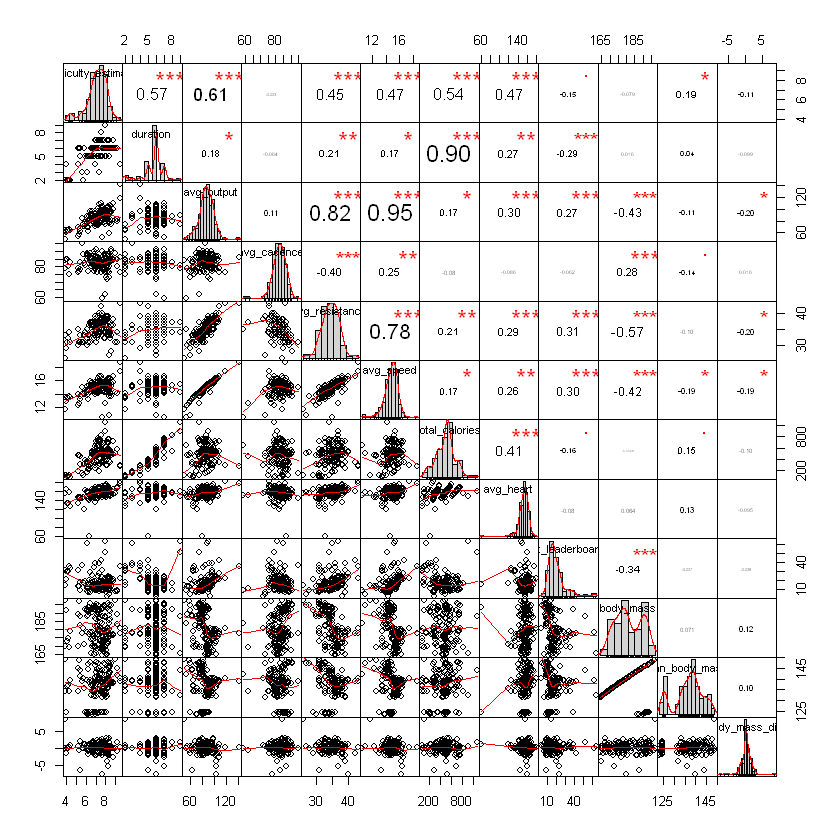

In [ ]:
chart.Correlation(cor_data, histogram=TRUE, pch=19)

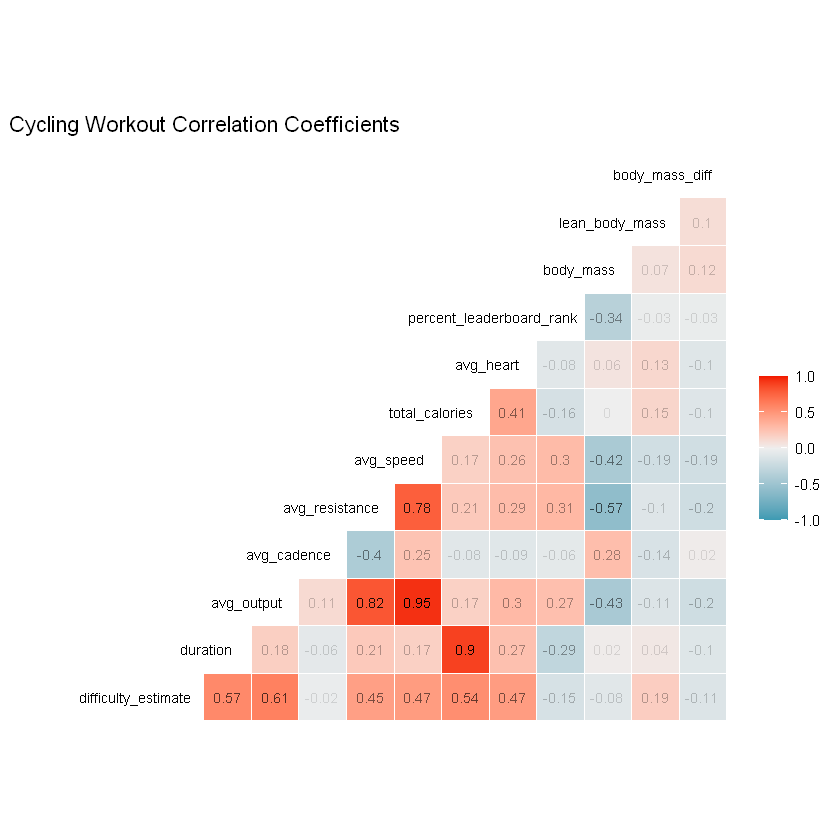

In [ ]:
ggcorr(cor_data, label = TRUE, label_size = 3,label_round = 2, label_alpha = TRUE, hjust = .90, size = 3,layout.exp = 3) +
    labs(title = "Cycling Workout Correlation Coefficients")

#### Correlation Observations
* Only slight correlations between the change in weight and lean_body mass with other variables which is not likely a significant measure as the p values are all above .005. 
* Statistically significant correlations for body mass include average output, average cadence, average resistance, average speed and percent on the leaderboard.  Average speed, output and resistance are moderately negative meaning as those metrics go up, body mass goes down.  There is a very slight positive correlation between cadence and body mass indicating that as cadence goes up so does the overall body mass.  This could be a sign that low cadence, high resistance rides lead to more weight loss. Also the correlation between resistance and body mass is the highest.
* Percentile Rank on the leaderboard is also affected byt the avg speed, resistance and output.  Meaning as those measures increase, so does the percentile rank on the leaderboard which means I perform better than other riders.  The relation between percentile rank is slightly negative indicating as I lose weight, my leaderboard performance increases.  As duration increases, my leaderboard rank decreases. The correlation between duration, output, resistance, speed, body mass are statistically signivicant with p-values < .005
* Average heart rate has no correlation to body mass measures or leaderboard rank.  It has a moderately positive correlation with the difficulty rating and total calories burned.It has slightly positive correlation with resistance, speed and output.  More difficult rides will result in a higher heart rate.  When the heart rate is higher, more calories will be burned.
* duration has the biggest effect on calories burned with a correlation of .89 and a p-value = 0.
* average speed has a high positive correlation with average output and moderate positive correlations with average resistance and the difficulty rating.  As mentioned previously, it has a statisticaly signifficant negative correlation with body mass.
* Average resistance has a statistically significant correlation to all variables except for lean body mass and change in body mass.  It has a high positive correlation with the average speed and average output, a modrately positive relationship with difficulty estimate, and a moderately negative relationship with cadence.  This makes sense as it is difficult to maintain a high cadence at a high resistance.  SInce the participant participates in a large percentage of power zone rides, resistance and cadence are at opposite ends of intensity to maintain zones.  
* Cadence has statistically significant relationships with average resistance, speed, and body mass. Cadence and speed have a slightly positive relationship with speed even though it has a negative relationship with resistance. Both cadennce and resistance have an impact on speed but the resistance has a stronger relationship.  The impact on body mass is slightly positive meaning riding with higher cadences can lead to weight gain if resistance is not high enough.
* Statistically significant relationships include difficulty, speed, resistance, avg_heart, leaderboard and body_mass.  Difficulty estimate, resistance and speed are strong positvie relationships. Body mass has a moderate negative relationship
* Statistically significant relationships for duration include difficulty estimate, avg_resistance, total_calories, avg_heart, and leaderboard percent.  Strongly positive correlation with total calories burned.  Slightly negative relationship with leaderboard ranking.  Most 60min + rides are endurance with lower resistances and we have already observed that a lower resistance usually has a high cadence which also reduces leaderboard rank
* Statistically significant strong positvie relationships for difficulty estimate include duration, avg_output, resist, speed, total_calories, avg_heart.  THis indicates that these metrics are good predictors for the difficulty of a ride.


In [ ]:
cor_values <- flattenCorrMatrix(res2$r, res2$P)

In [ ]:
cor_values

row,column,cor,p
difficulty_estimate,duration,0.56970501,3.397282e-14
difficulty_estimate,avg_output,0.61367012,0.000000e+00
duration,avg_output,0.18191014,2.639467e-02
difficulty_estimate,avg_cadence,-0.02269383,7.835345e-01
duration,avg_cadence,-0.06408306,4.374868e-01
avg_output,avg_cadence,0.11425022,1.653186e-01
difficulty_estimate,avg_resistance,0.44912906,9.180006e-09
duration,avg_resistance,0.21371550,8.868859e-03
avg_output,avg_resistance,0.81679868,0.000000e+00
avg_cadence,avg_resistance,-0.40109997,3.992477e-07


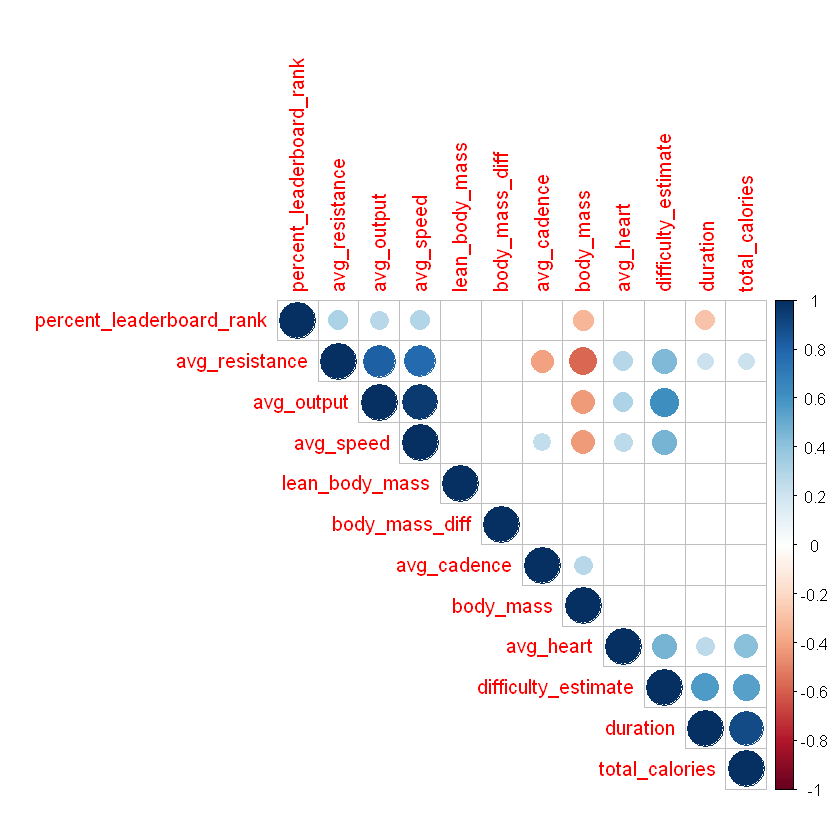

In [ ]:
# Insignificant correlations are leaved blank
corrplot(res2$r, type="upper", order="hclust", 
         p.mat = res2$P, sig.level = 0.01, insig = "blank")

In [ ]:
corr <- round(cor(cor_data), 2)
head(corr[, 1:6])

,difficulty_estimate,duration,avg_output,avg_cadence,avg_resistance,avg_speed
difficulty_estimate,1.00,0.57,0.61,-0.02,0.45,0.47
duration,0.57,1.00,0.18,-0.06,0.21,0.17
avg_output,0.61,0.18,1.00,0.11,0.82,0.95
avg_cadence,-0.02,-0.06,0.11,1.00,-0.40,0.25
avg_resistance,0.45,0.21,0.82,-0.40,1.00,0.78
avg_speed,0.47,0.17,0.95,0.25,0.78,1.00


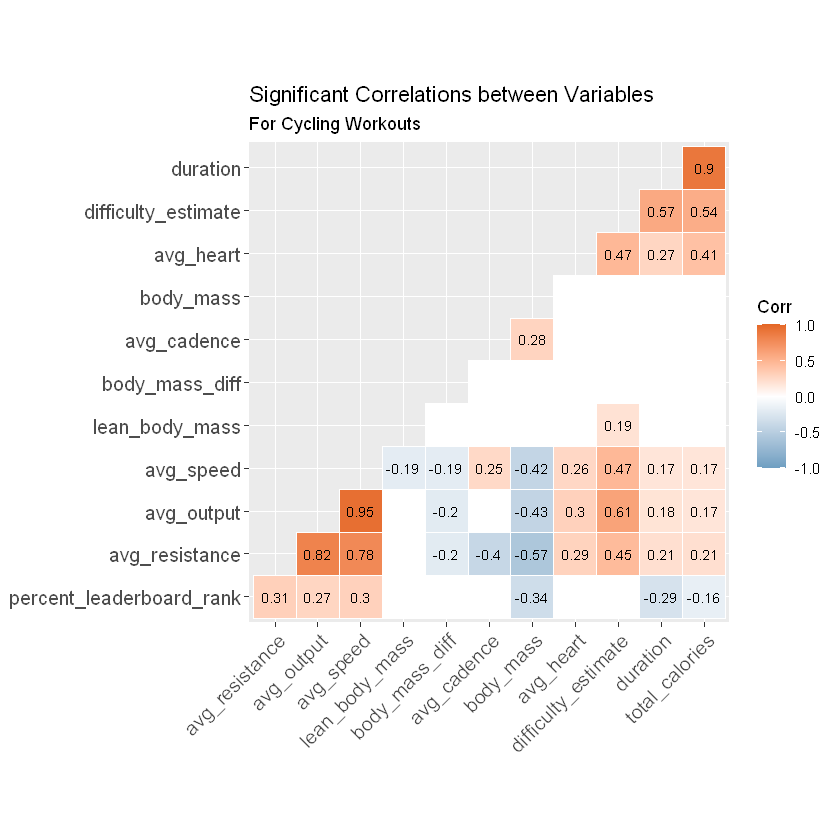

In [ ]:
ggcorrplot(res2$r, hc.order = TRUE, type = "lower",
   outline.col = "white",
   ggtheme = ggplot2::theme_gray,
   colors = c("#6D9EC1", "white", "#E46726"), p.mat=res2$P, lab=TRUE, lab_size=3, insig="blank") +
    labs(title = "Significant Correlations between Variables", subtitle="For Cycling Workouts")

In [ ]:
subset(cor_values, column == 'body_mass_diff')

,row,column,cor,p
56,difficulty_estimate,body_mass_diff,-0.11442557,0.16611459
57,duration,body_mass_diff,-0.09858577,0.23322797
58,avg_output,body_mass_diff,-0.19901479,0.01531266
59,avg_cadence,body_mass_diff,0.01571820,0.84961431
60,avg_resistance,body_mass_diff,-0.19930387,0.01516170
61,avg_speed,body_mass_diff,-0.18537438,0.02409305
62,total_calories,body_mass_diff,-0.10159178,0.21921447
63,avg_heart,body_mass_diff,-0.09525398,0.24948146
64,percent_leaderboard_rank,body_mass_diff,-0.02841551,0.73261607
65,body_mass,body_mass_diff,0.11812078,0.15276646


In [ ]:
subset(cor_values, column == 'body_mass' | row =='body_mass')

,row,column,cor,p
37,difficulty_estimate,body_mass,-0.079463723,3.353801e-01
38,duration,body_mass,0.016285073,8.437308e-01
39,avg_output,body_mass,-0.428682598,4.915499e-08
40,avg_cadence,body_mass,0.278251053,5.903816e-04
41,avg_resistance,body_mass,-0.574480055,1.865175e-14
42,avg_speed,body_mass,-0.422920818,7.733545e-08
43,total_calories,body_mass,-0.002583217,9.750569e-01
44,avg_heart,body_mass,0.063727184,4.400413e-01
45,percent_leaderboard_rank,body_mass,-0.338286051,2.608588e-05
55,body_mass,lean_body_mass,0.071279035,3.892986e-01


In [ ]:
subset(cor_values, column == 'lean_body_mass' | row =='lean_body_mass')

,row,column,cor,p
46,difficulty_estimate,lean_body_mass,0.18965644,0.02096014
47,duration,lean_body_mass,0.04027008,0.62700267
48,avg_output,lean_body_mass,-0.11440516,0.16619066
49,avg_cadence,lean_body_mass,-0.13756018,0.09546709
50,avg_resistance,lean_body_mass,-0.10153265,0.21948424
51,avg_speed,lean_body_mass,-0.18795109,0.02216301
52,total_calories,lean_body_mass,0.14658575,0.07543865
53,avg_heart,lean_body_mass,0.13415332,0.10404238
54,percent_leaderboard_rank,lean_body_mass,-0.02656220,0.74945607
55,body_mass,lean_body_mass,0.07127904,0.38929858


In [ ]:
subset(cor_values, column == 'percent_leaderboard_rank' | row =='percent_leaderboard_rank')

,row,column,cor,p
29,difficulty_estimate,percent_leaderboard_rank,-0.15317393,6.308033e-02
30,duration,percent_leaderboard_rank,-0.28598534,4.258099e-04
31,avg_output,percent_leaderboard_rank,0.27041343,8.874327e-04
32,avg_cadence,percent_leaderboard_rank,-0.06244473,4.508685e-01
33,avg_resistance,percent_leaderboard_rank,0.31071258,1.212884e-04
34,avg_speed,percent_leaderboard_rank,0.29575306,2.627793e-04
35,total_calories,percent_leaderboard_rank,-0.15822697,5.476823e-02
36,avg_heart,percent_leaderboard_rank,-0.08004844,3.334804e-01
45,percent_leaderboard_rank,body_mass,-0.33828605,2.608588e-05
54,percent_leaderboard_rank,lean_body_mass,-0.02656220,7.494561e-01


In [ ]:
subset(cor_values, column == 'avg_heart' | row =='avg_heart')

,row,column,cor,p
22,difficulty_estimate,avg_heart,0.46696215,1.935853e-09
23,duration,avg_heart,0.26623170,1.031320e-03
24,avg_output,avg_heart,0.30403116,1.635415e-04
25,avg_cadence,avg_heart,-0.08593733,2.973683e-01
26,avg_resistance,avg_heart,0.28622685,4.020227e-04
27,avg_speed,avg_heart,0.26127163,1.288809e-03
28,total_calories,avg_heart,0.41336444,1.609944e-07
36,avg_heart,percent_leaderboard_rank,-0.08004844,3.334804e-01
44,avg_heart,body_mass,0.06372718,4.400413e-01
53,avg_heart,lean_body_mass,0.13415332,1.040424e-01


In [ ]:
subset(cor_values, column == 'total_calories' | row =='total_calories')

,row,column,cor,p
16,difficulty_estimate,total_calories,0.541579312,9.898748e-13
17,duration,total_calories,0.897755167,0.000000e+00
18,avg_output,total_calories,0.169163434,3.916961e-02
19,avg_cadence,total_calories,-0.080408415,3.296480e-01
20,avg_resistance,total_calories,0.212900529,9.137863e-03
21,avg_speed,total_calories,0.169820878,3.840234e-02
28,total_calories,avg_heart,0.413364442,1.609944e-07
35,total_calories,percent_leaderboard_rank,-0.158226973,5.476823e-02
43,total_calories,body_mass,-0.002583217,9.750569e-01
52,total_calories,lean_body_mass,0.146585753,7.543865e-02


In [ ]:
subset(cor_values, column == 'avg_speed' | row =='avg_speed')

,row,column,cor,p
11,difficulty_estimate,avg_speed,0.4694202,1.551032e-09
12,duration,avg_speed,0.1741444,3.366521e-02
13,avg_output,avg_speed,0.9510565,0.000000e+00
14,avg_cadence,avg_speed,0.2468237,2.408647e-03
15,avg_resistance,avg_speed,0.7772143,0.000000e+00
21,avg_speed,total_calories,0.1698209,3.840234e-02
27,avg_speed,avg_heart,0.2612716,1.288809e-03
34,avg_speed,percent_leaderboard_rank,0.2957531,2.627793e-04
42,avg_speed,body_mass,-0.4229208,7.733545e-08
51,avg_speed,lean_body_mass,-0.1879511,2.216301e-02


In [ ]:
subset(cor_values, column == 'avg_resistance' | row =='avg_resistance')

,row,column,cor,p
7,difficulty_estimate,avg_resistance,0.4491291,9.180006e-09
8,duration,avg_resistance,0.2137155,8.868859e-03
9,avg_output,avg_resistance,0.8167987,0.000000e+00
10,avg_cadence,avg_resistance,-0.4011000,3.992477e-07
15,avg_resistance,avg_speed,0.7772143,0.000000e+00
20,avg_resistance,total_calories,0.2129005,9.137863e-03
26,avg_resistance,avg_heart,0.2862269,4.020227e-04
33,avg_resistance,percent_leaderboard_rank,0.3107126,1.212884e-04
41,avg_resistance,body_mass,-0.5744801,1.865175e-14
50,avg_resistance,lean_body_mass,-0.1015326,2.194842e-01


In [ ]:
subset(cor_values, column == 'avg_cadence' | row =='avg_cadence')

,row,column,cor,p
4,difficulty_estimate,avg_cadence,-0.02269383,7.835345e-01
5,duration,avg_cadence,-0.06408306,4.374868e-01
6,avg_output,avg_cadence,0.11425022,1.653186e-01
10,avg_cadence,avg_resistance,-0.40109997,3.992477e-07
14,avg_cadence,avg_speed,0.24682373,2.408647e-03
19,avg_cadence,total_calories,-0.08040841,3.296480e-01
25,avg_cadence,avg_heart,-0.08593733,2.973683e-01
32,avg_cadence,percent_leaderboard_rank,-0.06244473,4.508685e-01
40,avg_cadence,body_mass,0.27825105,5.903816e-04
49,avg_cadence,lean_body_mass,-0.13756018,9.546709e-02


In [ ]:
subset(cor_values, column == 'avg_output' | row =='avg_output')

,row,column,cor,p
2,difficulty_estimate,avg_output,0.6136701,0.000000e+00
3,duration,avg_output,0.1819101,2.639467e-02
6,avg_output,avg_cadence,0.1142502,1.653186e-01
9,avg_output,avg_resistance,0.8167987,0.000000e+00
13,avg_output,avg_speed,0.9510565,0.000000e+00
18,avg_output,total_calories,0.1691634,3.916961e-02
24,avg_output,avg_heart,0.3040312,1.635415e-04
31,avg_output,percent_leaderboard_rank,0.2704134,8.874327e-04
39,avg_output,body_mass,-0.4286826,4.915499e-08
48,avg_output,lean_body_mass,-0.1144052,1.661907e-01


In [ ]:
subset(cor_values, column == 'duration' | row =='duration')
# diff_estimate, avg_resistance, total_calories,avg_heart, leaderboard

,row,column,cor,p
1,difficulty_estimate,duration,0.56970501,3.397282e-14
3,duration,avg_output,0.18191014,2.639467e-02
5,duration,avg_cadence,-0.06408306,4.374868e-01
8,duration,avg_resistance,0.21371550,8.868859e-03
12,duration,avg_speed,0.17414443,3.366521e-02
17,duration,total_calories,0.89775517,0.000000e+00
23,duration,avg_heart,0.26623170,1.031320e-03
30,duration,percent_leaderboard_rank,-0.28598534,4.258099e-04
38,duration,body_mass,0.01628507,8.437308e-01
47,duration,lean_body_mass,0.04027008,6.270027e-01


In [ ]:
subset(cor_values, column == 'difficulty_estimate' | row =='difficulty_estimate')
#duration, avg_output, resist, speed, total_calories, avg_heart

,row,column,cor,p
1,difficulty_estimate,duration,0.56970501,3.397282e-14
2,difficulty_estimate,avg_output,0.61367012,0.000000e+00
4,difficulty_estimate,avg_cadence,-0.02269383,7.835345e-01
7,difficulty_estimate,avg_resistance,0.44912906,9.180006e-09
11,difficulty_estimate,avg_speed,0.46942019,1.551032e-09
16,difficulty_estimate,total_calories,0.54157931,9.898748e-13
22,difficulty_estimate,avg_heart,0.46696215,1.935853e-09
29,difficulty_estimate,percent_leaderboard_rank,-0.15317393,6.308033e-02
37,difficulty_estimate,body_mass,-0.07946372,3.353801e-01
46,difficulty_estimate,lean_body_mass,0.18965644,2.096014e-02


# modeling steps
- drop lean body mass and change in body mass
- exclude data after 1/31/2021
- derive a difficulty rating based on the  duration, avg_output, resist, speed, total_calories, avg_heart

In [ ]:
model_data <- df %>% filter(fitness_discipline=='cycling') %>% select(-one_of(
    c('fitness_discipline', 'is_total_work_personal_record', 'instructor_name', 'Power.Zone', 'start_time',
      'month','year','weekday','hour','total_output','total_distance','max_heart','max_output','max_resist',
     'max_cadence','max_speed', 'lean_body_mass')))

#set avg heart rate = new average heart rate and drop the new_avg_heart colum
model_data$avg_heart <- model_data$new_avg_heart
model_data <- subset(model_data, select=-new_avg_heart)

head(model_data)

difficulty_estimate,duration,avg_output,avg_cadence,avg_resistance,avg_speed,total_calories,avg_heart,date_only,percent_leaderboard_rank,body_mass
8.0258,60,89,85,35,15.3,702,159,2021-05-20,11.33225,NA
8.2692,45,88,87,33,14.7,531,160,2021-05-19,12.34951,NA
6.1463,30,77,87,32,14.5,353,160,2021-05-18,12.51002,191.8
7.2753,60,84,85,34,15.0,743,165,2021-05-16,11.47447,190.6
6.5793,45,82,82,35,14.9,481,150,2021-05-13,11.86708,190.4
6.6279,45,80,83,34,14.6,476,149,2021-05-10,14.00455,192.0


In [ ]:
str(model_data)

'data.frame':	328 obs. of  11 variables:
 $ difficulty_estimate     : num  8.03 8.27 6.15 7.28 6.58 ...
 $ duration                : Factor w/ 9 levels "5","10","15",..: 7 6 5 7 6 6 5 8 6 6 ...
 $ avg_output              : int  89 88 77 84 82 80 80 79 88 90 ...
 $ avg_cadence             : int  85 87 87 85 82 83 88 83 88 86 ...
 $ avg_resistance          : int  35 33 32 34 35 34 33 34 34 34 ...
 $ avg_speed               : num  15.3 14.7 14.5 15 14.9 14.6 14.7 14.6 15.2 15.2 ...
 $ total_calories          : int  702 531 353 743 481 476 218 539 360 367 ...
 $ avg_heart               : num  159 160 160 165 150 ...
 $ date_only               : Date, format: "2021-05-20" "2021-05-19" ...
 $ percent_leaderboard_rank: num  11.3 12.3 12.5 11.5 11.9 ...
 $ body_mass               : num  NA NA 192 191 190 ...


In [ ]:
write.csv(model_data, '../Data/modeling_dataset.csv',  row.names=FALSE, quote=FALSE)